# Libraries & Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from cdt.data import AcyclicGraphGenerator

import cdt
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [2]:
sns.set()
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
dataset_dir = "datasets"

breast_cancer_df = pd.read_csv(f"{dataset_dir}/breast_cancer.csv")
thyroid_df = pd.read_csv(f"{dataset_dir}/thyroid.csv")
cardio_df = pd.read_csv(f"{dataset_dir}/cardio.csv", delimiter=";", index_col='id')

## Breast cancer dataset preprocessing

In [4]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Convert column "diagnosis" from categorical to binary
breast_cancer_df.loc[breast_cancer_df['diagnosis'] == "M", 'diagnosis'] = 1
breast_cancer_df.loc[breast_cancer_df['diagnosis'] == "B", 'diagnosis'] = 0

# Drop colum "Unnamed: 32" (contains only nan values)
breast_cancer_df.drop(columns=["Unnamed: 32", 'id'], inplace=True)
#target_bc = breast_cancer_df.pop('diagnosis').to_numpy().astype(int)

Text(0.5, 1.0, 'Diagnosis Distribution in Breast Cancer data')

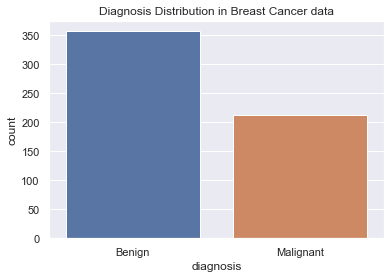

In [6]:
sns.countplot(breast_cancer_df['diagnosis'])
plt.xticks(ticks=[0,1], labels=['Benign', 'Malignant'])
plt.title('Diagnosis Distribution in Breast Cancer data')

In [7]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
scaler = StandardScaler()
diagnosis = breast_cancer_df['diagnosis']
breast_cancer_df = breast_cancer_df.iloc[:, 1:]
breast_cancer_df = pd.DataFrame(scaler.fit_transform(breast_cancer_df.to_numpy()), columns=breast_cancer_df.columns)
breast_cancer_df['diagnosis'] = diagnosis

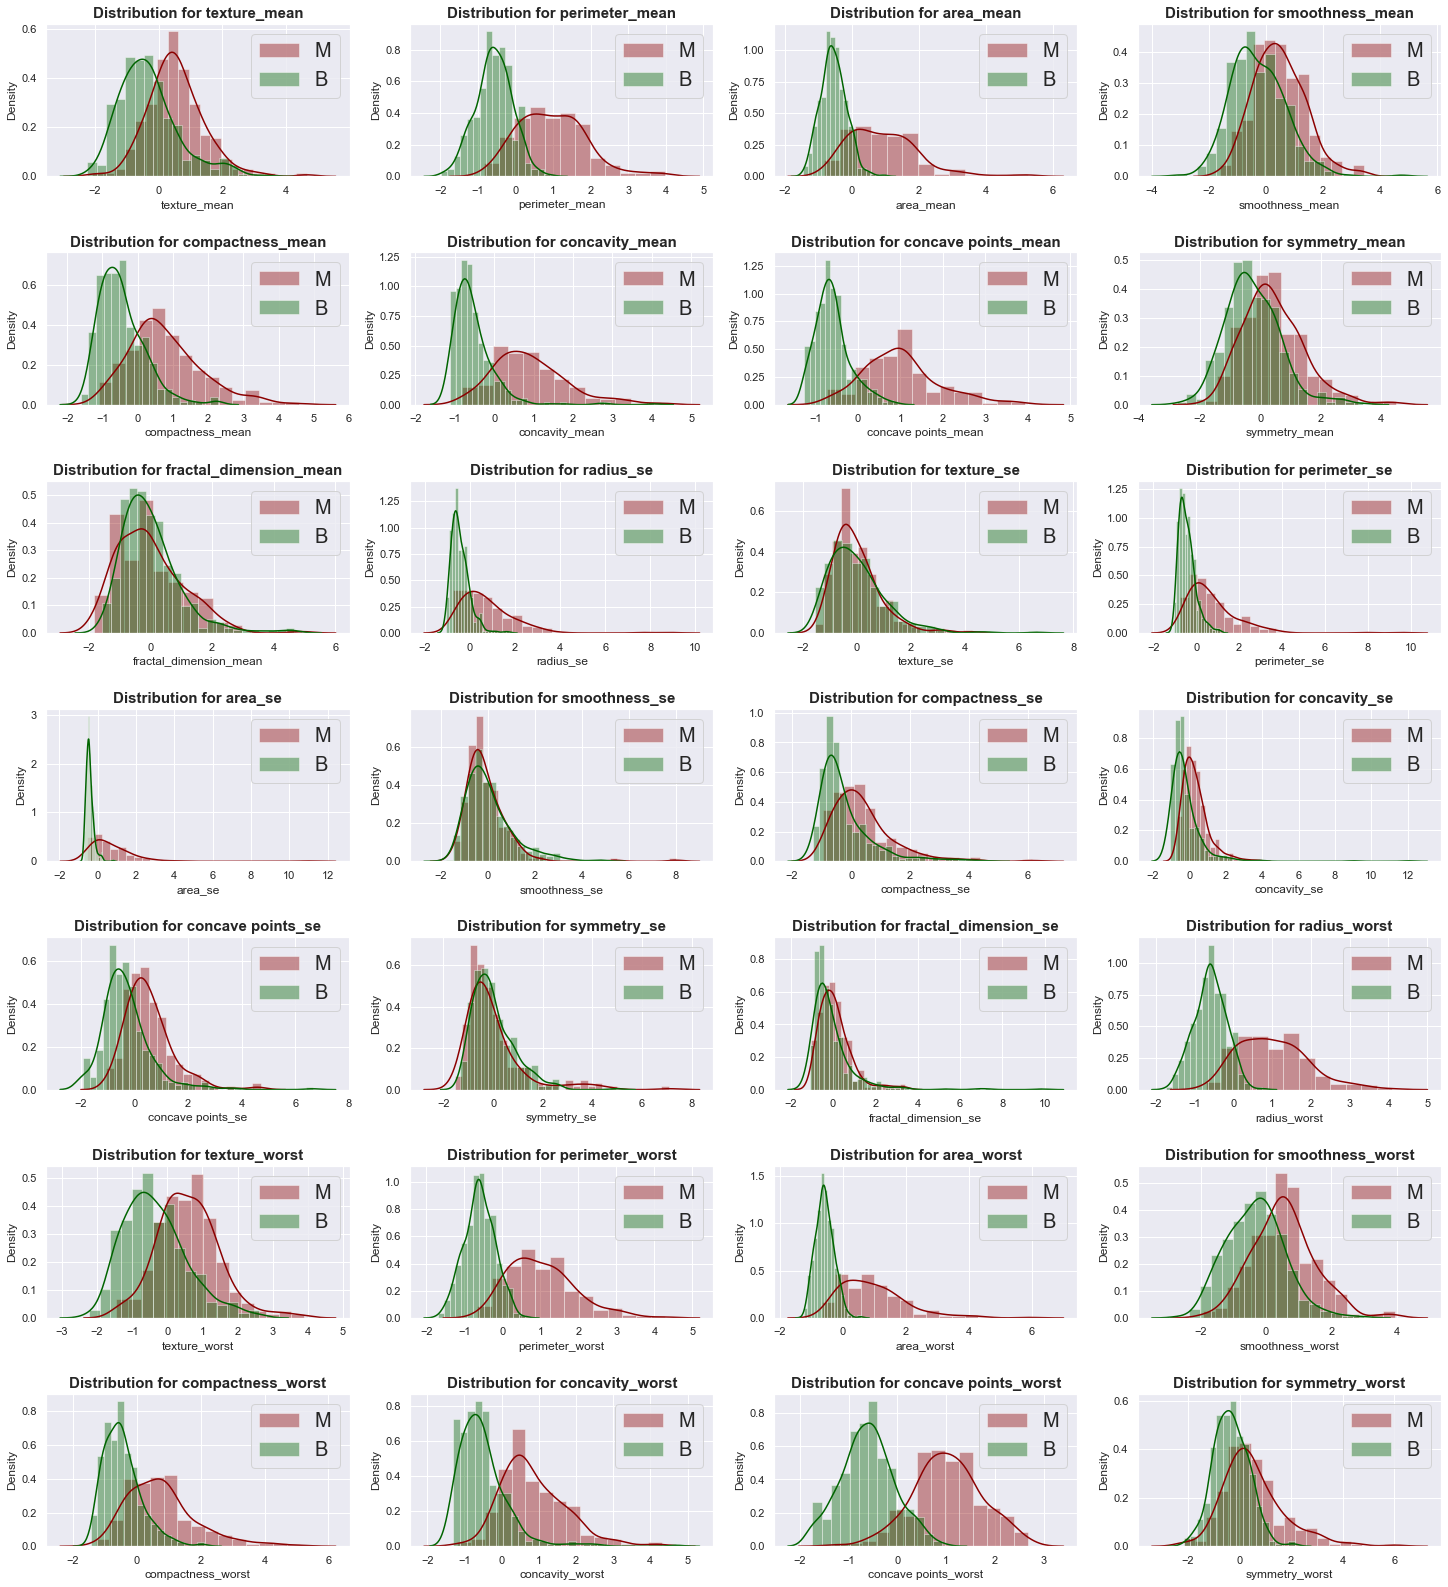

In [10]:
x = breast_cancer_df
num_feat = x.shape[1]-2
fig = plt.figure(figsize=(25, num_feat))
fig.subplots_adjust(hspace=.5)
axs = [fig.add_subplot(num_feat / 4, 4, i + 1) for i in range(num_feat)]

for i, column in enumerate(x.columns[:-2]):
    sns.distplot(x[x.diagnosis == 1][column], ax=axs[i], color='darkred', label="M")
    sns.distplot(x[x.diagnosis == 0][column], ax=axs[i], color='darkgreen', label="B")
    axs[i].set_title('Distribution for {}'.format( column), fontweight='bold', fontsize=15)
    axs[i].legend(fontsize=20)
plt.show()

In [11]:
breast_cancer_df.corr()

texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
texture_mean                     1.00            0.33       0.32            -0.02              0.24            0.30                 0.29           0.07                   -0.08       0.28        0.39          0.28     0.26           0.01            0.19          0.14               0.16         0.01                  0.05          0.35           0.91             0.36        0.34              0.08               0.28             0.30                  0.30            0.11                     0.12
perimeter_mean                   0.33            1.00       0.99             0.21              0.56            0.72                 0.85           0.18                   -0.26       0.69       -0.09          0.69     0.74          -0.20            0.25          0.23               0.41        -0.08                 -0.01          0.97           0.30             0.97        0.94              0.15               0.46             0.56                  0.77            0.19                     0.05
area_mean                        0.32            0.99       1.00             0.18              0.50            0.69                 0.82           0.15                   -0.28       0.73       -0.07          0.73     0.80          -0.17            0.21          0.21               0.37        -0.07                 -0.02          0.96           0.29             0.96        0.96              0.12               0.39             0.51                  0.72            0.14                     0.00
smoothness_mean                 -0.02            0.21       0.18             1.00              0.66            0.52                 0.55           0.56                    0.58       0.30        0.07          0.30     0.25           0.33            0.32          0.25               0.38         0.20                  0.28          0.21           0.04             0.24        0.21              0.81               0.47             0.43                  0.50            0.39                     0.50
compactness_mean                 0.24            0.56       0.50             0.66              1.00            0.88                 0.83           0.60                    0.57       0.50        0.05          0.55     0.46           0.14            0.74          0.57               0.64         0.23                  0.51          0.54           0.25             0.59        0.51              0.57               0.87             0.82                  0.82            0.51                     0.69
concavity_mean                   0.30            0.72       0.69             0.52              0.88            1.00                 0.92           0.50                    0.34       0.63        0.08          0.66     0.62           0.10            0.67          0.69               0.68         0.18                  0.45          0.69           0.30             0.73        0.68              0.45               0.75             0.88                  0.86            0.41                     0.51
concave points_mean              0.29            0.85       0.82             0.55              0.83            0.92                 1.00           0.46                    0.17       0.70        0.02          0.71     0.69           0.03            0.49          0.44               0.62         0.10                  0.26          0.83           0.29             0.86        0.81              0.45               0.67             0.75                  0.91            0.38                     0.37
symmetry_mean                    0.07            0.18    

<AxesSubplot:>

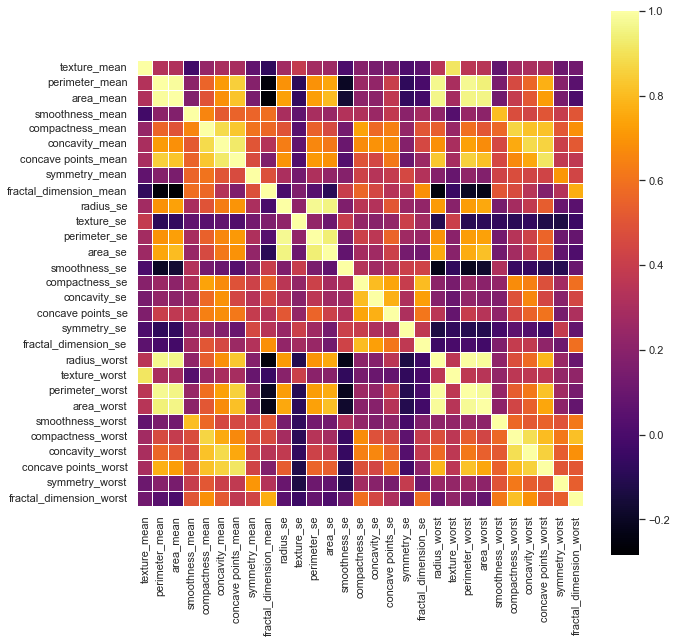

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(breast_cancer_df.corr(), linewidth=.5, square=True, cmap='inferno')

## Thyroid dataset preprocessing

In [59]:
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [60]:
# Binarize textual data
thyroid_df.replace({'F': 0., 'f': 0., 'M': 1., 't': 1., "P": 1., "N": 0.}, inplace=True)

# Categorical encoding for "referreal source" column
thyroid_df.replace({'SVHC': 0, 'SVI': 1, 'STMW': 2, 'SVHD': 3, 'other': -1}, inplace=True)

# "?" values have to removed. They cannot be mapped to np.nan because the algorithm won't work. I decided to map those values to 0, but we should discuss this choice
thyroid_df.replace({'?': 0.}, inplace=True)

In [61]:
# There are no measurements for TBG, can be dropped
thyroid_df.drop(columns=["TBG", "TBG measured"], inplace=True)
#target_t = thyroid_df.pop('binaryClass').to_numpy().astype(int)

Text(0.5, 1.0, 'Diagnosis Distribution in Thyroid data')

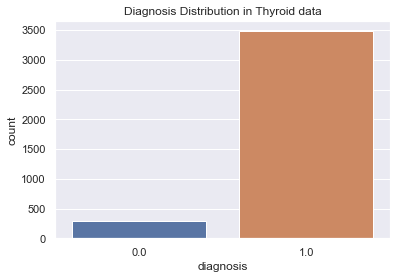

In [62]:
sns.countplot(thyroid_df['binaryClass'])
plt.xlabel('diagnosis')
plt.title('Diagnosis Distribution in Thyroid data')

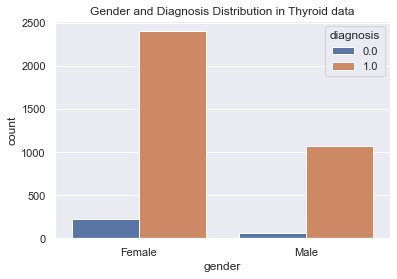

In [63]:
sns.countplot(thyroid_df['sex'], hue=thyroid_df['binaryClass'])
plt.xlabel('gender')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.title('Gender and Diagnosis Distribution in Thyroid data')
plt.legend(title='diagnosis')

In [64]:
thyroid_df

age  sex  on thyroxine  query on thyroxine  on antithyroid medication  sick  pregnant  thyroid surgery  I131 treatment  query hypothyroid  query hyperthyroid  lithium  goitre  tumor  hypopituitary  psych  TSH measured   TSH  T3 measured   T3  TT4 measured  TT4  T4U measured   T4U  FTI measured  FTI  referral source  binaryClass
0     41 0.00          0.00                0.00                       0.00  0.00      0.00             0.00            0.00               0.00                0.00     0.00    0.00   0.00           0.00   0.00          1.00   1.3         1.00  2.5          1.00  125          1.00  1.14          1.00  109                0         1.00
1     23 0.00          0.00                0.00                       0.00  0.00      0.00             0.00            0.00               0.00                0.00     0.00    0.00   0.00           0.00   0.00          1.00   4.1         1.00    2          1.00  102          0.00  0.00          0.00 0.00               -1         1.00
2     46 1.00          0.00                0.00                       0.00  0.00      0.00             0.00            0.00               0.00                0.00     0.00    0.00   0.00           0.00   0.00          1.00  0.98         0.00 0.00          1.00  109          1.00  0.91          1.00  120               -1         1.00
3     70 0.00          1.00                0.00                       0.00  0.00      0.00             0.00            0.00               0.00                0.00     0.00    0.00   0.00           0.00   0.00          1.00  0.16         1.00  1.9          1.00  175          0.00  0.00          0.00 0.00               -1         1.00
4     70 0.00          0.00                0.00                       0.00  0.00      0.00             0.00            0.00               0.00                0.00     0.00    0.00   0.00           0.00   0.00          1.00  0.72         1.00  1.2          1.00   61          1.00  0.87          1.00   70                1         1.00
...   ..  ...           ...                 ...                        ...   ...       ...              ...             ...                ...                 ...      ...     ...    ...            ...    ...           ...   ...          ...  ...           ...  ...           ...   ...           ...  ...              ...          ...
3767  30 0.00          0.00                0.00                       0.00  0.00      0.00             0.00            0.00               0.00                0.00     0.00    0.00   1.00           0.00   0.00          0.00  0.00         0.00 0.00          0.00 0.00          0.00  0.00          0.00 0.00               -1         1.00
3768  68 0.00          0.00                0.00                       0.00  0.00      0.00             0.00            0.00               0.00                0.00     0.00    0.00   0.00           0.00   0.00          1.00     1         1.00  2.1          1.00  124          1.00  1.08          1.00  114                1         1.00
3769  74 0.00          0.00                0.00                       0.00  0.00      0.00             0.00            0.00               0.00                1.00     0.00    0.00   0.00           0.00   0.00          1.00   5.1         1.00  1.8          1.00  112          1.00  1.07          1.00  105               -1         1.00
3770  72 1.00          0.00                0.00                       0.00  0.00      0.00             0.00            0.00               0.00                0.00     0.00    0.00   0.00           0.00   0.00          1.00   0.7         1.00    2          1.00   82          1.00  0.94          1.00   87                1         1.00
3771  64 0.00          0.00                0.00                       0.00  0.00      0.00             0.00            0.00               0.00                0.00     0.00    0.00   0.00           0.00   0.00          1.00     1         1.00  2.2          1.00   99          1.00  1.07          1.00   92               -

In [65]:
scaler = StandardScaler()
binaryClass = thyroid_df['binaryClass']
thyroid_df = thyroid_df.iloc[:, :-1]
thyroid_df = pd.DataFrame(scaler.fit_transform(thyroid_df.to_numpy()), columns=thyroid_df.columns)
thyroid_df['binaryClass'] = binaryClass

In [66]:
thyroid_df

age   sex  on thyroxine  query on thyroxine  on antithyroid medication  sick  pregnant  thyroid surgery  I131 treatment  query hypothyroid  query hyperthyroid  lithium  goitre  tumor  hypopituitary  psych  TSH measured   TSH  T3 measured    T3  TT4 measured   TT4  T4U measured   T4U  FTI measured   FTI  referral source  binaryClass
0    -0.53 -0.66         -0.37               -0.12                      -0.11 -0.20     -0.12            -0.12           -0.13              -0.26               -0.26    -0.07   -0.10  -0.16          -0.02  -0.23          0.33 -0.14         0.51  0.82          0.26  0.54          0.34  0.70          0.34  0.21             0.22         1.00
1    -1.43 -0.66         -0.37               -0.12                      -0.11 -0.20     -0.12            -0.12           -0.13              -0.26               -0.26    -0.07   -0.10  -0.16          -0.02  -0.23          0.33 -0.02         0.51  0.36          0.26  0.01         -2.96 -2.52         -2.97 -2.16            -0.77         1.00
2    -0.28  1.52         -0.37               -0.12                      -0.11 -0.20     -0.12            -0.12           -0.13              -0.26               -0.26    -0.07   -0.10  -0.16          -0.02  -0.23          0.33 -0.15        -1.98 -1.46          0.26  0.17          0.34  0.05          0.34  0.45            -0.77         1.00
3     0.91 -0.66          2.67               -0.12                      -0.11 -0.20     -0.12            -0.12           -0.13              -0.26               -0.26    -0.07   -0.10  -0.16          -0.02  -0.23          0.33 -0.19         0.51  0.27          0.26  1.70         -2.96 -2.52         -2.97 -2.16            -0.77         1.00
4     0.91 -0.66         -0.37               -0.12                      -0.11 -0.20     -0.12            -0.12           -0.13              -0.26               -0.26    -0.07   -0.10  -0.16          -0.02  -0.23          0.33 -0.17         0.51 -0.37          0.26 -0.94          0.34 -0.06          0.34 -0.64             1.21         1.00
...    ...   ...           ...                 ...                        ...   ...       ...              ...             ...                ...                 ...      ...     ...    ...            ...    ...           ...   ...          ...   ...           ...   ...           ...   ...           ...   ...              ...          ...
3767 -1.08 -0.66         -0.37               -0.12                      -0.11 -0.20     -0.12            -0.12           -0.13              -0.26               -0.26    -0.07   -0.10   6.19          -0.02  -0.23         -3.03 -0.20        -1.98 -1.46         -3.92 -2.36         -2.96 -2.52         -2.97 -2.16            -0.77         1.00
3768  0.81 -0.66         -0.37               -0.12                      -0.11 -0.20     -0.12            -0.12           -0.13              -0.26               -0.26    -0.07   -0.10  -0.16          -0.02  -0.23          0.33 -0.15         0.51  0.45          0.26  0.52          0.34  0.53          0.34  0.32             1.21         1.00
3769  1.11 -0.66         -0.37               -0.12                      -0.11 -0.20     -0.12            -0.12           -0.13              -0.26                3.86    -0.07   -0.10  -0.16          -0.02  -0.23          0.33  0.02         0.51  0.18          0.26  0.24          0.34  0.50          0.34  0.13            -0.77         1.00
3770  1.01  1.52         -0.37               -0.12                      -0.11 -0.20     -0.12            -0.12           -0.13              -0.26               -0.26    -0.07   -0.10  -0.16          -0.02  -0.23          0.33 -0.17         0.51  0.36          0.26 -0.46          0.34  0.13          0.34 -0.27             1.21         1.00
3771  0.61 -0.66         -0.37               -0.12                      -0.11 -0.20     -0.12            -0.12           -0.13              -0.26               -0.26    -0.07   -0.10  -0.16          -0.02  -0.23          0.33 -0.15         0.51  0.54      

LinAlgError: singular matrix

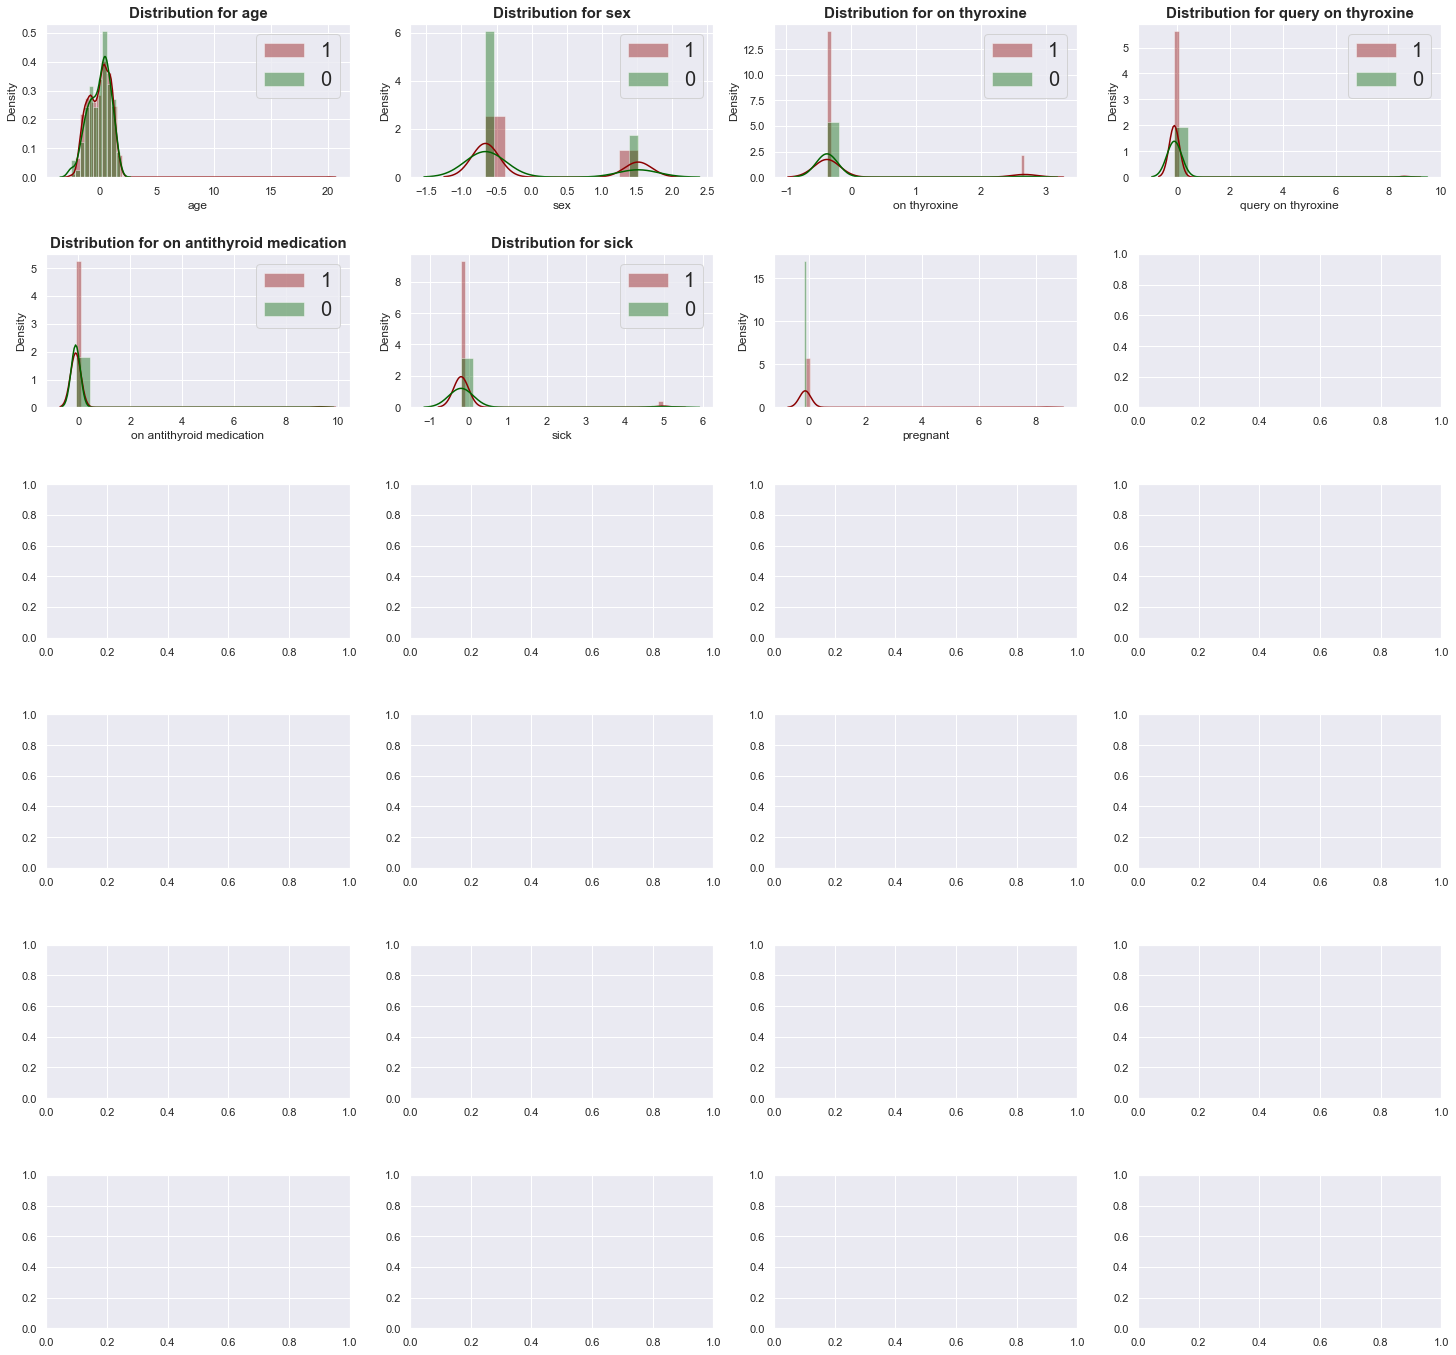

In [67]:
x = thyroid_df
num_feat = x.shape[1]-4
fig = plt.figure(figsize=(25, num_feat))
fig.subplots_adjust(hspace=.5)
axs = [fig.add_subplot(num_feat / 4, 4, i + 1) for i in range(num_feat)]

for i, column in enumerate(x.columns[:-4]):
    sns.distplot(x[x.binaryClass == 1][column], ax=axs[i], color='darkred', label="1")
    sns.distplot(x[x.binaryClass == 0][column], ax=axs[i], color='darkgreen', label="0")
    axs[i].set_title('Distribution for {}'.format( column), fontweight='bold', fontsize=15)
    axs[i].legend(fontsize=20)
plt.show()

## Cardiovascular disease dataset preprocessing

In [103]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  float64
 2   height       70000 non-null  float64
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  float64
 5   ap_lo        70000 non-null  float64
 6   cholesterol  70000 non-null  float64
 7   gluc         70000 non-null  float64
 8   smoke        70000 non-null  float64
 9   alco         70000 non-null  float64
 10  active       70000 non-null  float64
 11  cardio       70000 non-null  float64
dtypes: float64(12)
memory usage: 6.4 MB


Text(0.5, 1.0, 'Diagnosis Distribution in Cardiovascular data')

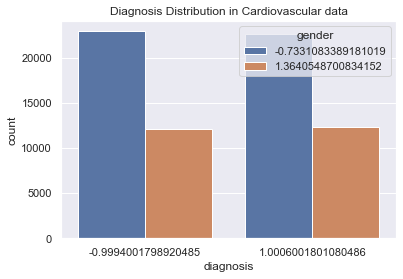

In [104]:
sns.countplot(cardio_df['cardio'], hue=cardio_df['gender'])
plt.xlabel('diagnosis')
plt.title('Diagnosis Distribution in Cardiovascular data')

Text(0.5, 1.0, 'Gender Distribution in CardioVascular data')

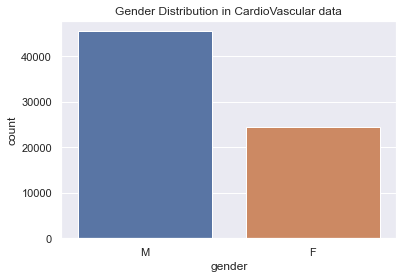

In [105]:
sns.countplot(cardio_df['gender'])
plt.xticks(ticks=[0,1], labels=['M', 'F'])
plt.title('Gender Distribution in CardioVascular data')

In [71]:
cardio_df['age'] = round(cardio_df['age']/365.0, 0)

In [72]:
scaler = StandardScaler()
cardio_df = pd.DataFrame(scaler.fit_transform(cardio_df.to_numpy()), columns=cardio_df.columns)

In [73]:
cardio_df

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio
0     -0.49    1.36    0.44   -0.85  -0.12  -0.09        -0.54 -0.40  -0.31 -0.24    0.49   -1.00
1      0.25   -0.73   -1.02    0.75   0.07  -0.04         2.40 -0.40  -0.31 -0.24    0.49    1.00
2     -0.20   -0.73    0.08   -0.71   0.01  -0.14         2.40 -0.40  -0.31 -0.24   -2.02    1.00
3     -0.79    1.36    0.57    0.54   0.14   0.02        -0.54 -0.40  -0.31 -0.24    0.49    1.00
4     -0.79   -0.73   -1.02   -1.26  -0.19  -0.19        -0.54 -0.40  -0.31 -0.24   -2.02   -1.00
...     ...     ...     ...     ...    ...    ...          ...   ...    ...   ...     ...     ...
69995 -0.05    1.36    0.44    0.12  -0.06  -0.09        -0.54 -0.40   3.22 -0.24    0.49   -1.00
69996  1.28   -0.73   -0.77    3.60   0.07  -0.04         0.93  1.35  -0.31 -0.24    0.49    1.00
69997 -0.20    1.36    2.27    2.14   0.33  -0.04         2.40 -0.40  -0.31  4.19   -2.02    1.00
69998  1.13   -0.73   -0.17   -0.15   0.04  -0.09        -0.54  1.35  -0.31 -0.24   -2.02    1.00
69999  0.39   -0.73    0.69   -0.15  -0.06  -0.09         0.93 -0.40  -0.31 -0.24    0.49   -1.00

[70000 rows x 12 columns]

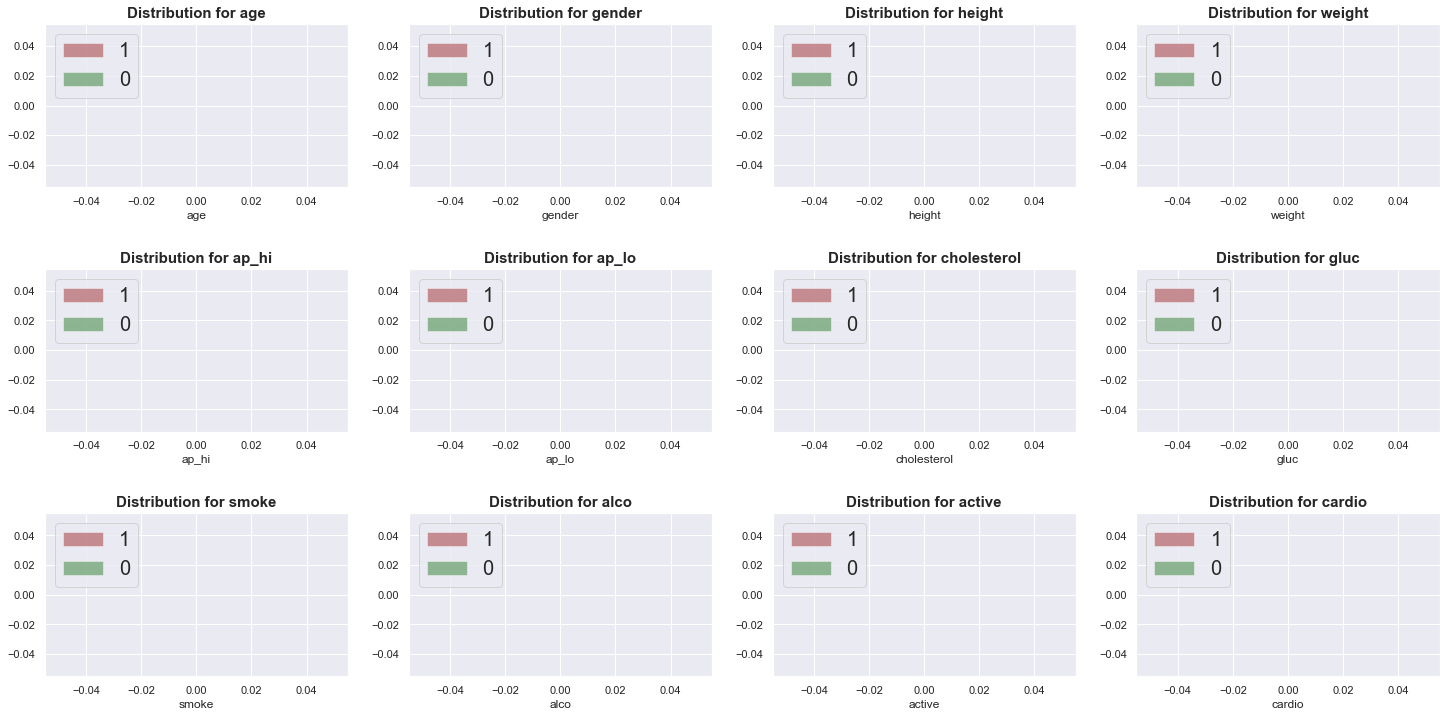

In [41]:
x = cardio_df
num_feat = x.shape[1]
fig = plt.figure(figsize=(25, num_feat))
fig.subplots_adjust(hspace=.5)
axs = [fig.add_subplot(num_feat / 4, 4, i + 1) for i in range(num_feat)]

for i, column in enumerate(x.columns[:]):
    sns.distplot(x[x.cardio == 1][column], ax=axs[i], color='darkred', label="1")
    sns.distplot(x[x.cardio == 0][column], ax=axs[i], color='darkgreen', label="0")
    axs[i].set_title('Distribution for {}'.format( column), fontweight='bold', fontsize=15)
    axs[i].legend(fontsize=20)
plt.show()

# Independence graphs

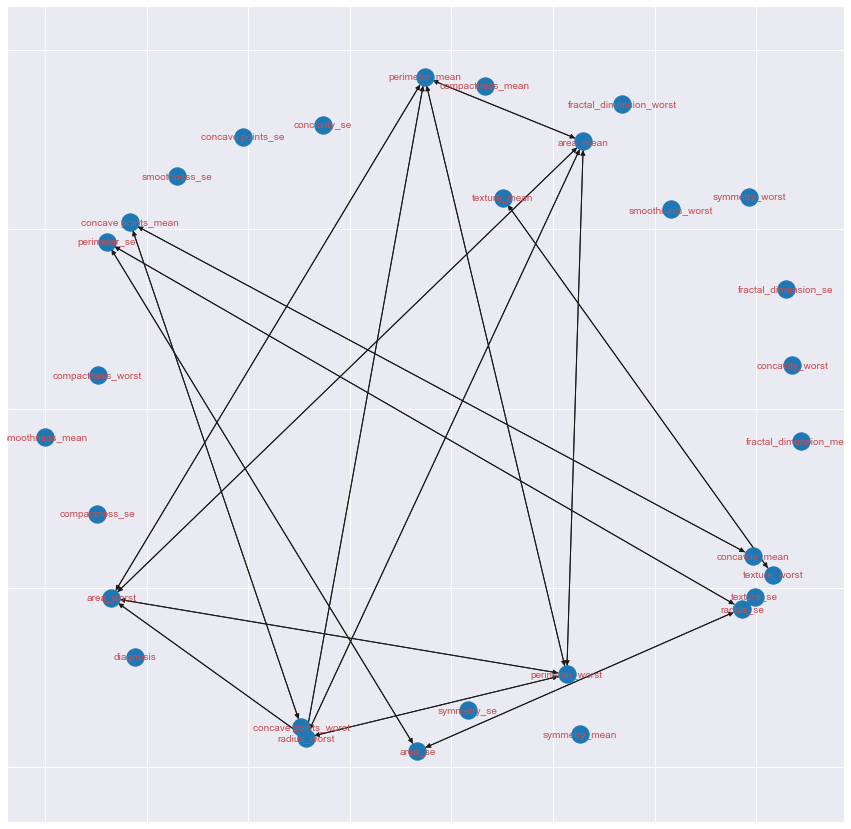

In [74]:
# intialize graph lasso
glasso = cdt.independence.graph.Glasso()

# apply graph lasso to dataset
skeleton_bc = glasso.predict(breast_cancer_df, 0.9)
skeleton_bc.remove_edges_from(nx.selfloop_edges(skeleton_bc))

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(skeleton_bc, font_size=10, font_color='r')

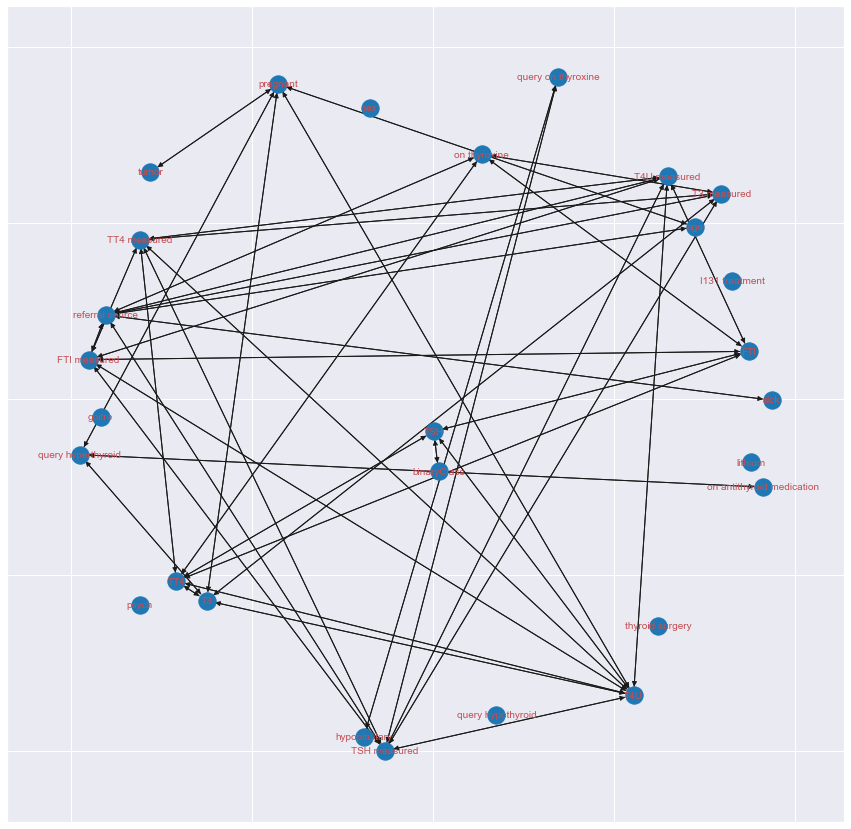

In [75]:
# intialize graph lasso
glasso = cdt.independence.graph.Glasso()

# apply graph lasso to dataset
skeleton_t = glasso.predict(thyroid_df, 0.1)
skeleton_t.remove_edges_from(nx.selfloop_edges(skeleton_t))

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(skeleton_t, font_size=10, font_color='r')

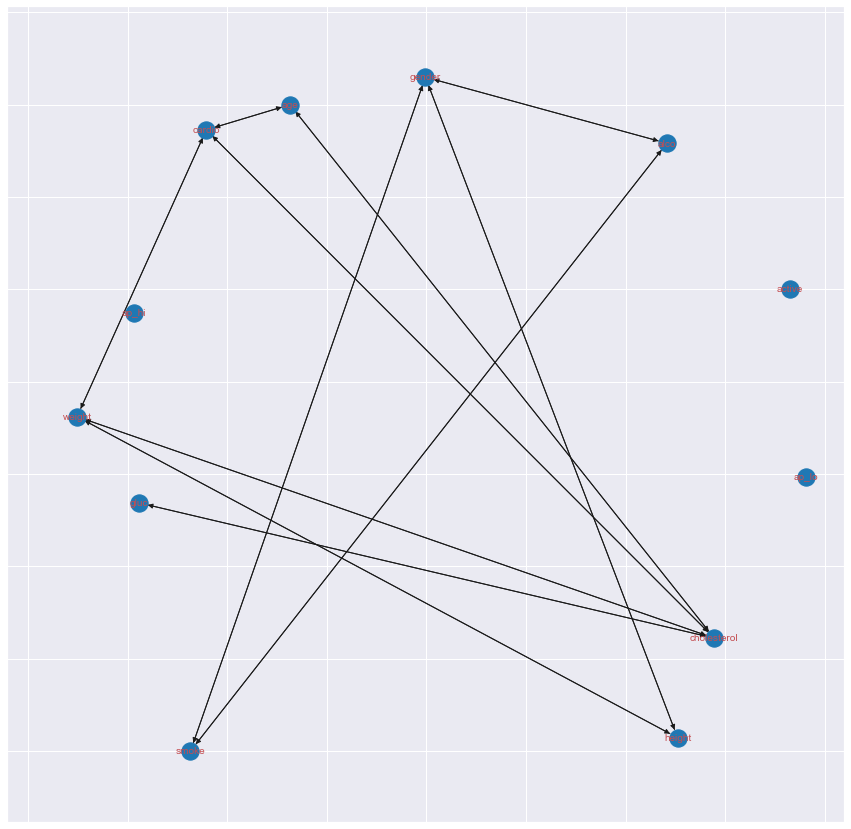

In [76]:
# intialize graph lasso
glasso = cdt.independence.graph.Glasso()

# apply graph lasso to dataset
skeleton_c = glasso.predict(cardio_df, 0.1)
skeleton_c.remove_edges_from(nx.selfloop_edges(skeleton_c))

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(skeleton_c, font_size=10, font_color='r')

# PC

## Constrained

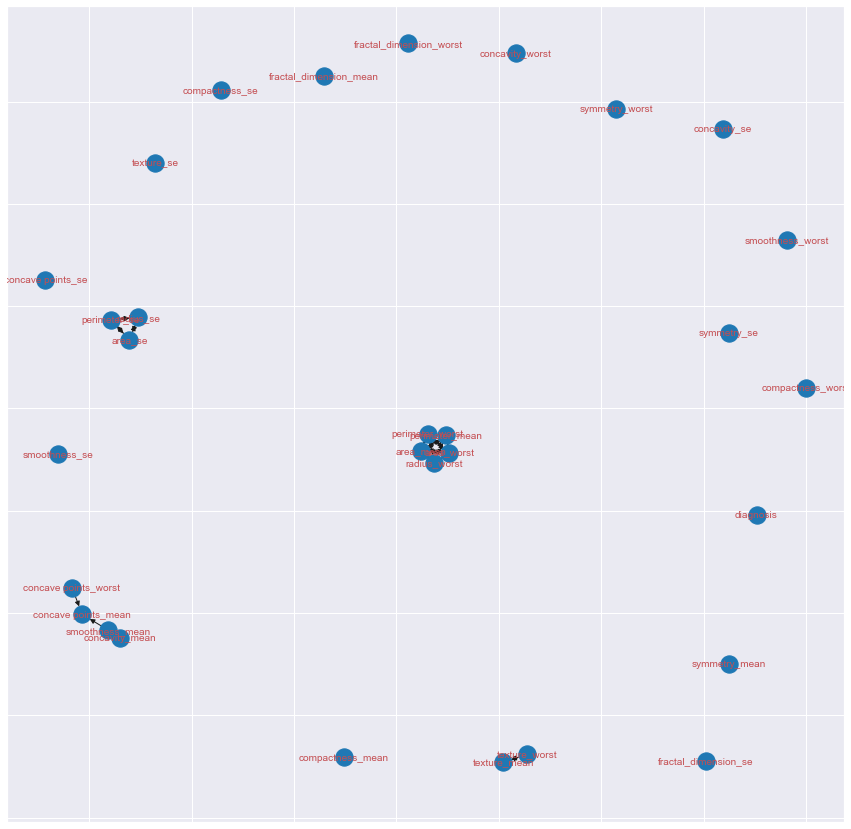

In [77]:
model_pc = cdt.causality.graph.PC()
graph_pc_c = model_pc.predict(breast_cancer_df, skeleton_bc)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_pc_c, font_size=10, font_color='r')

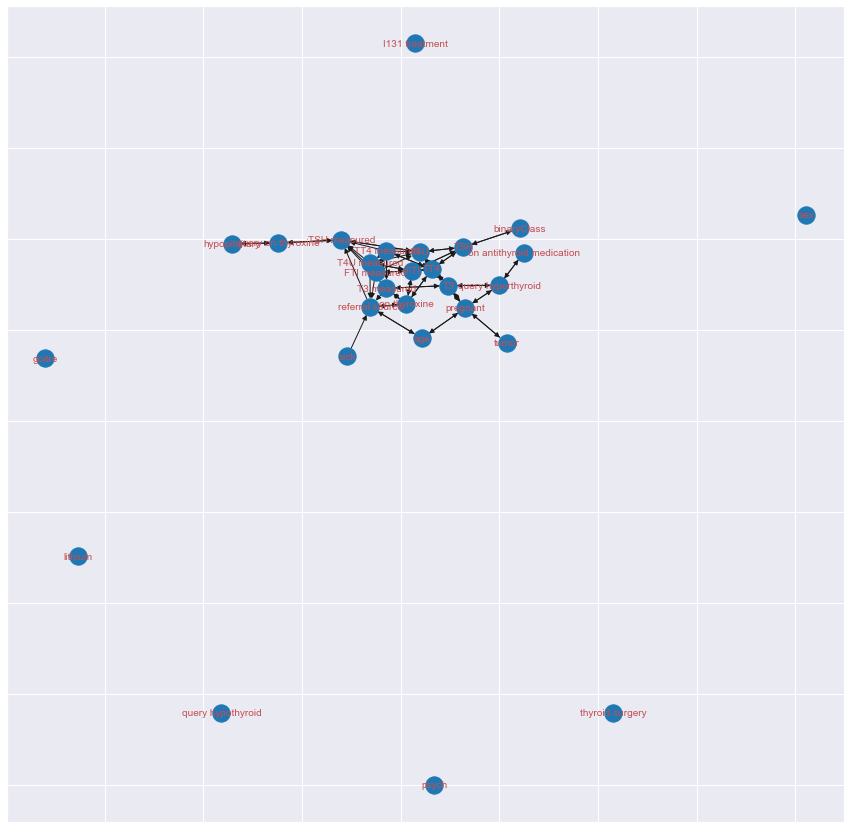

In [78]:
model_pc = cdt.causality.graph.PC()
graph_pc_c = model_pc.predict(thyroid_df, skeleton_t)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_pc_c, font_size=10, font_color='r')

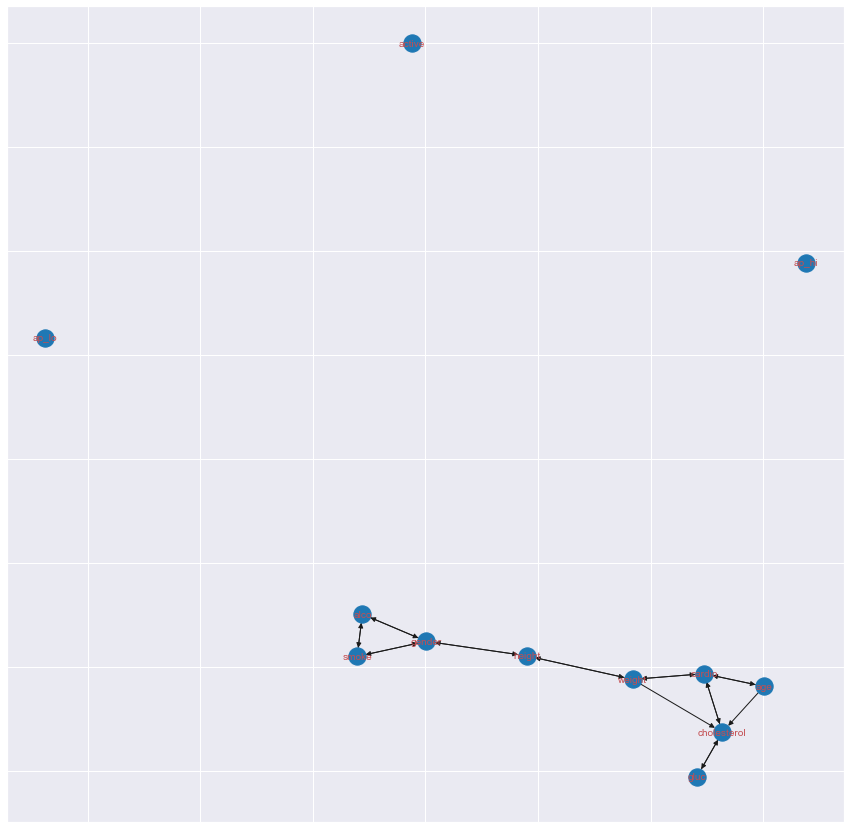

In [79]:
model_pc = cdt.causality.graph.PC()
graph_pc_c = model_pc.predict(cardio_df, skeleton_c)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_pc_c, font_size=10, font_color='r')

## Unconstrained

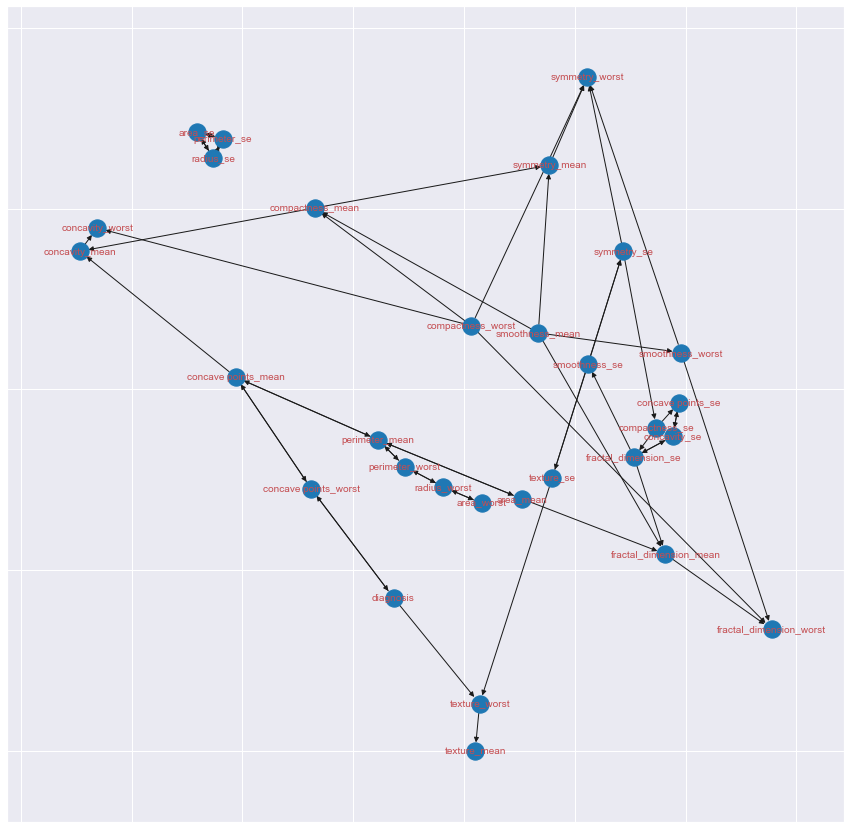

In [80]:
model_pc = cdt.causality.graph.PC()
graph_pc_u = model_pc.predict(breast_cancer_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_pc_u, font_size=10, font_color='r')

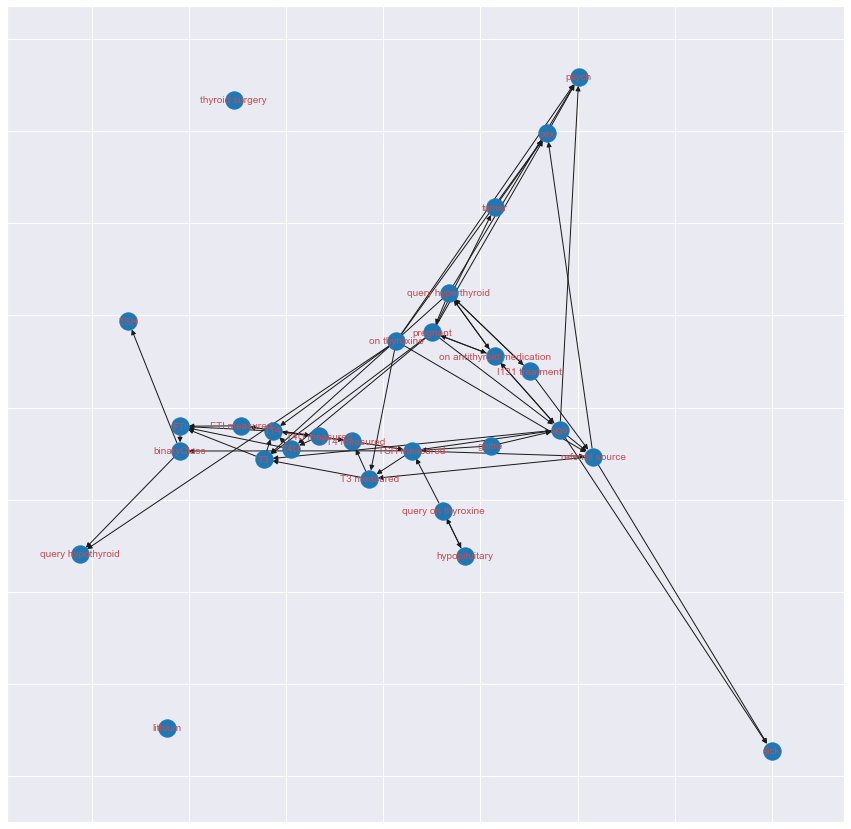

In [81]:
model_pc = cdt.causality.graph.PC()
graph_pc_u = model_pc.predict(thyroid_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_pc_u, font_size=10, font_color='r')

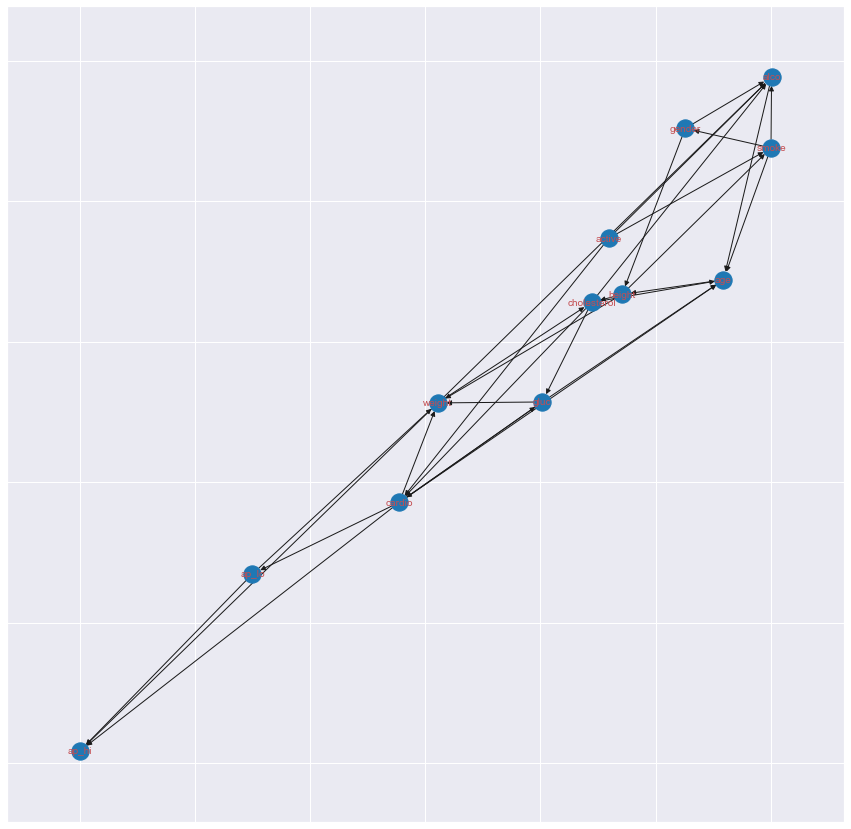

In [82]:
model_pc = cdt.causality.graph.PC()
graph_pc_u = model_pc.predict(cardio_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_pc_u, font_size=10, font_color='r')

# GES

## Constrained

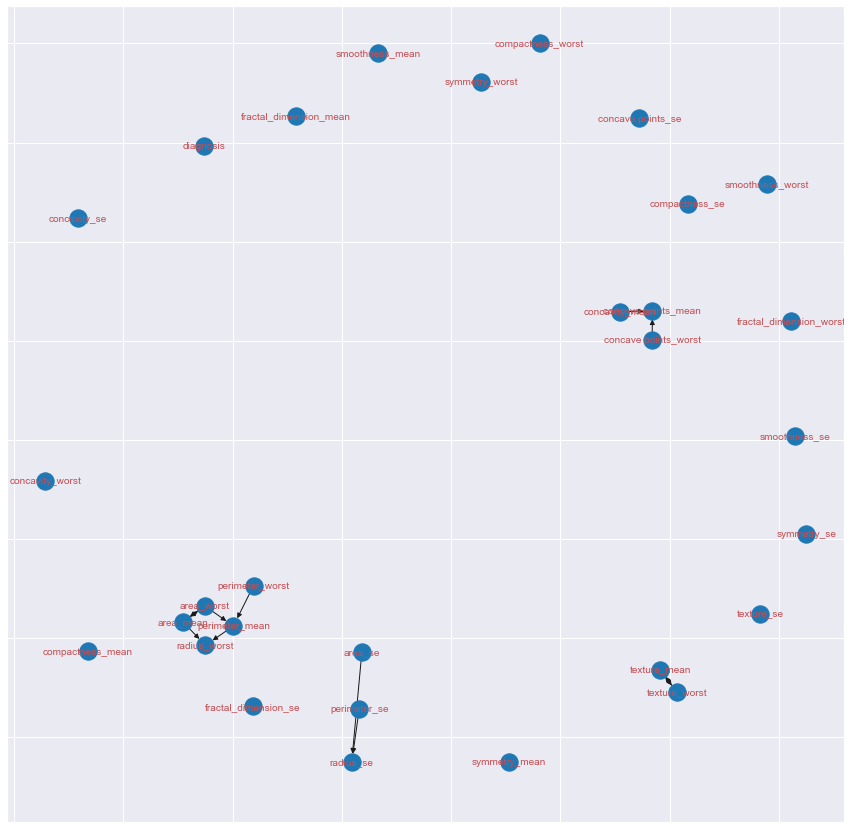

In [83]:
# GES algorithm
model_ges = cdt.causality.graph.GES()
graph_ges_c = model_ges.predict(breast_cancer_df, skeleton_bc)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_ges_c, font_size=10, font_color='r')

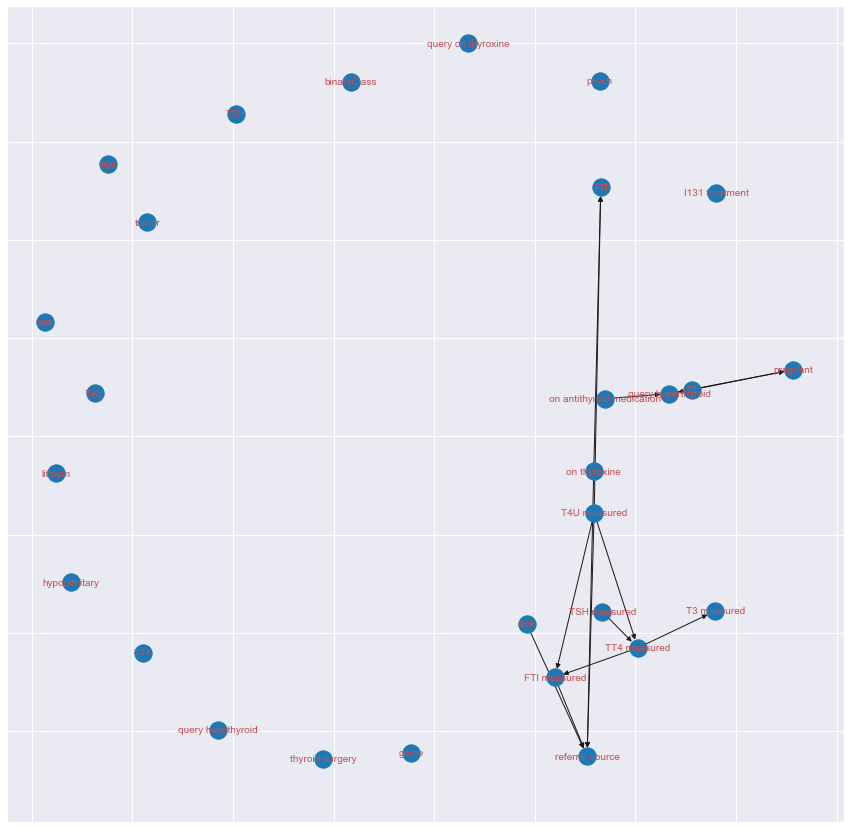

In [95]:
# GES algorithm
model_ges = cdt.causality.graph.GES()
graph_ges_c = model_ges.predict(thyroid_df, skeleton_t)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_ges_c, font_size=10, font_color='r')

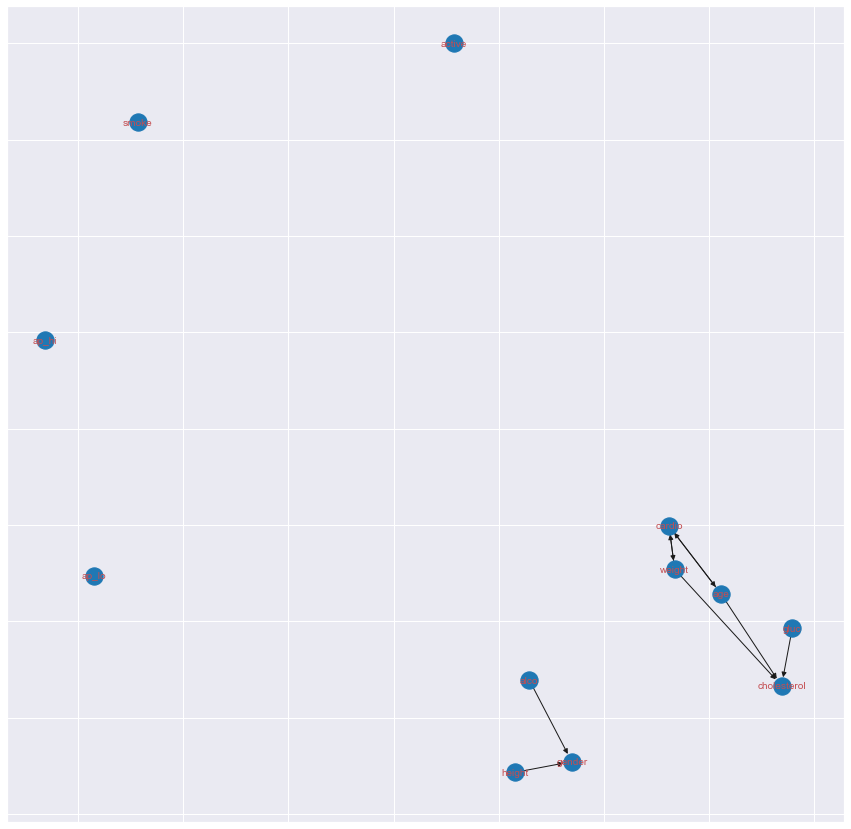

In [85]:
# GES algorithm
model_ges = cdt.causality.graph.GES()
graph_ges_c = model_ges.predict(cardio_df, skeleton_c)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_ges_c, font_size=10, font_color='r')

## Unconstrained

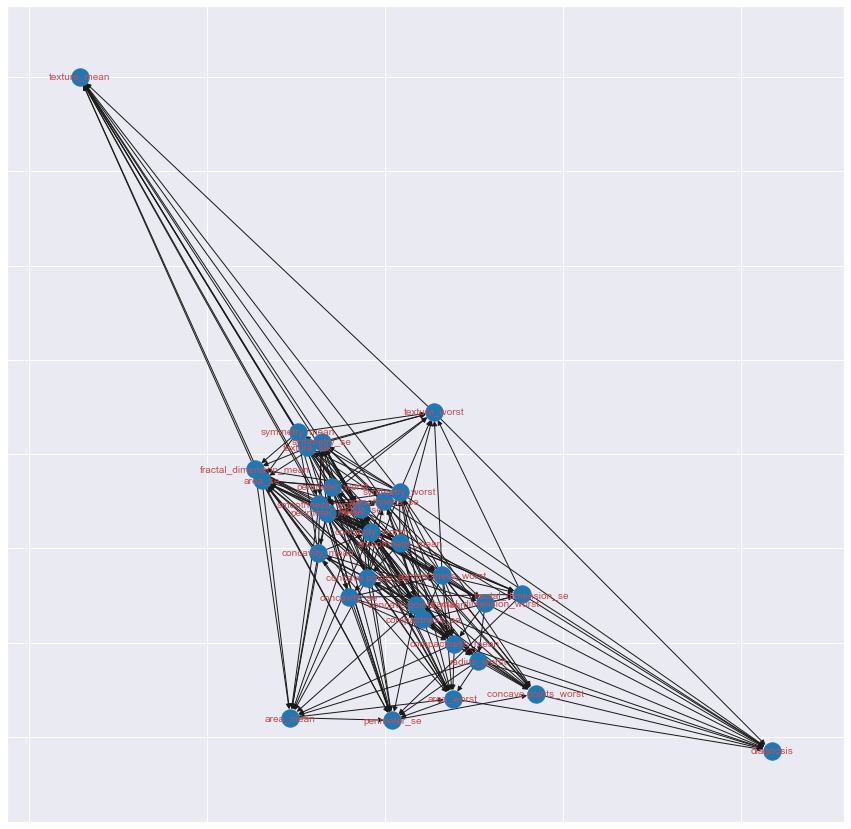

In [86]:
# GES algorithm
model_ges = cdt.causality.graph.GES()
graph_ges_u = model_ges.predict(breast_cancer_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_ges_u, font_size=10, font_color='r')

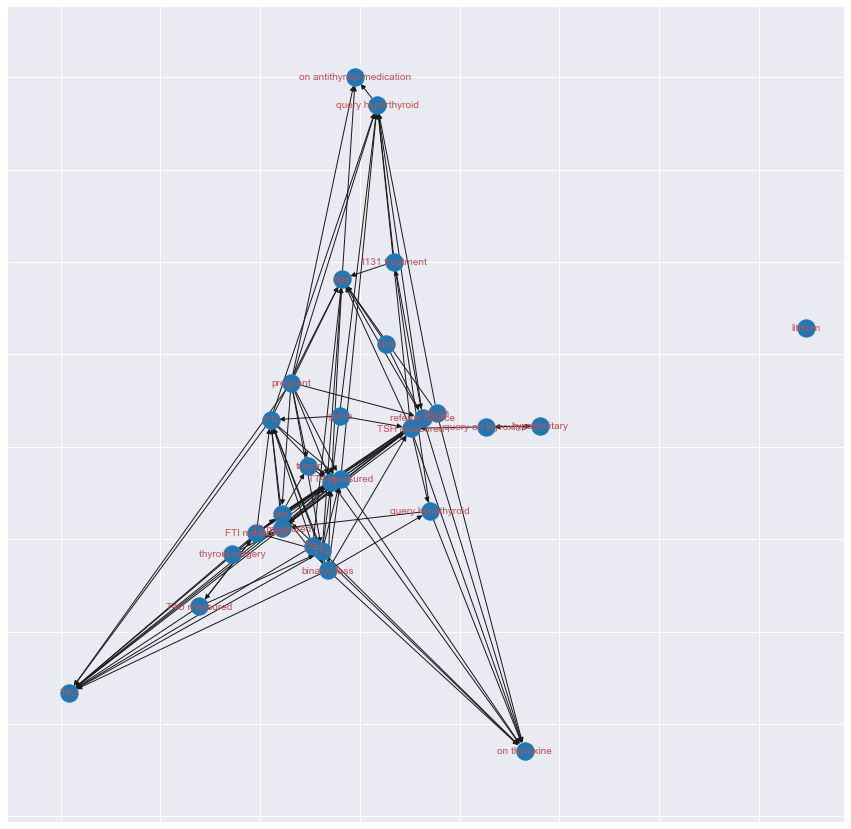

In [88]:
# GES algorithm
model_ges = cdt.causality.graph.GES()
graph_ges_u = model_ges.predict(thyroid_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_ges_u, font_size=10, font_color='r')

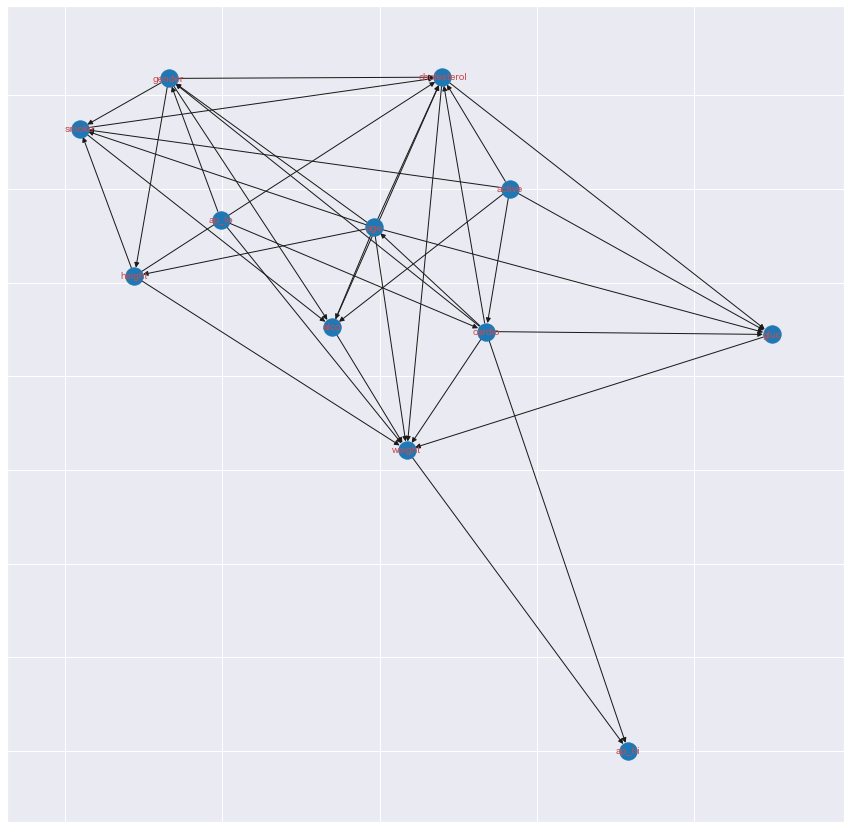

In [89]:
# GES algorithm
model_ges = cdt.causality.graph.GES()
graph_ges_u = model_ges.predict(cardio_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_ges_u, font_size=10, font_color='r')

# LiNGAM

## Unconstrained (LiNGAM cannot be perfomed constrained)

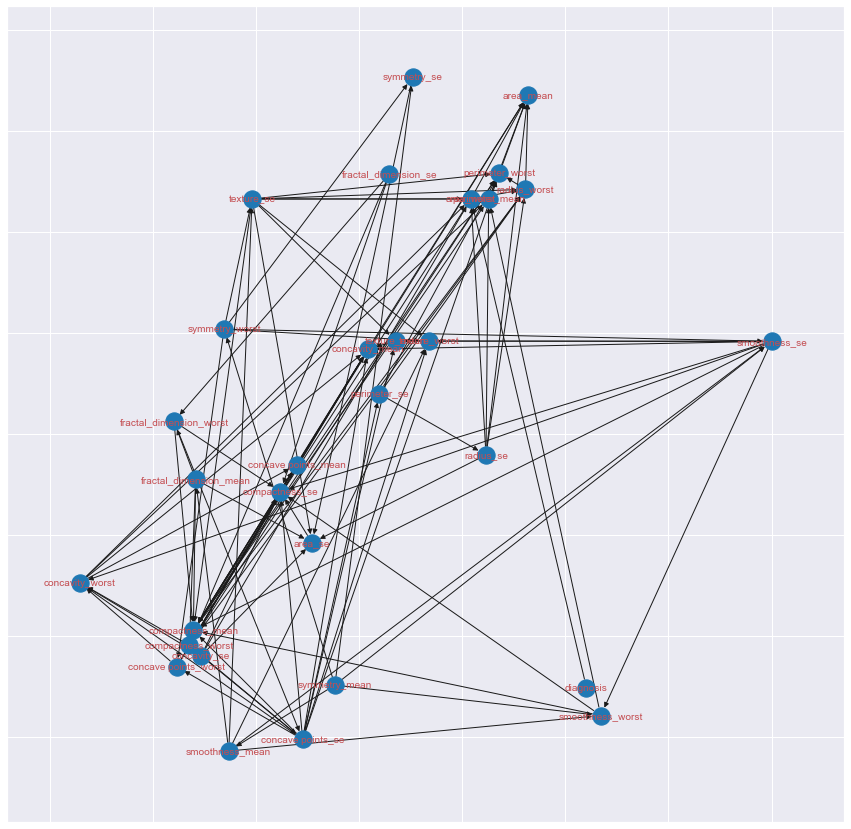

In [92]:
# LiNGAM Algorithm
model_lingam = cdt.causality.graph.LiNGAM()
graph_lingam = model_lingam.predict(breast_cancer_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_lingam, font_size=10, font_color='r')

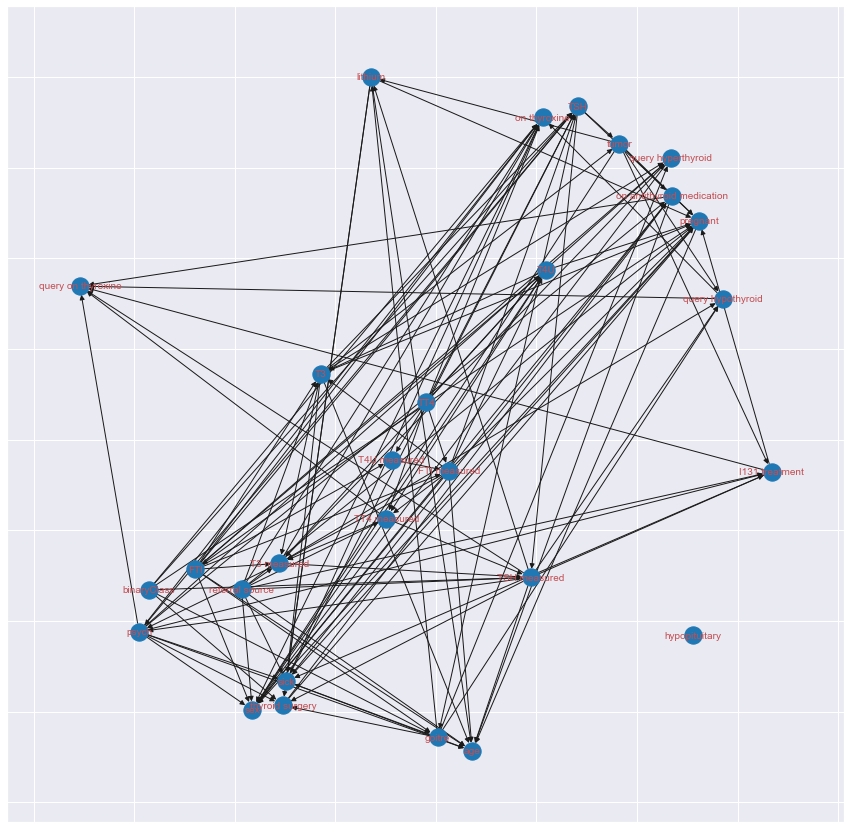

In [93]:
# LiNGAM Algorithm
model_lingam = cdt.causality.graph.LiNGAM()
graph_lingam = model_lingam.predict(thyroid_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_lingam, font_size=10, font_color='r')

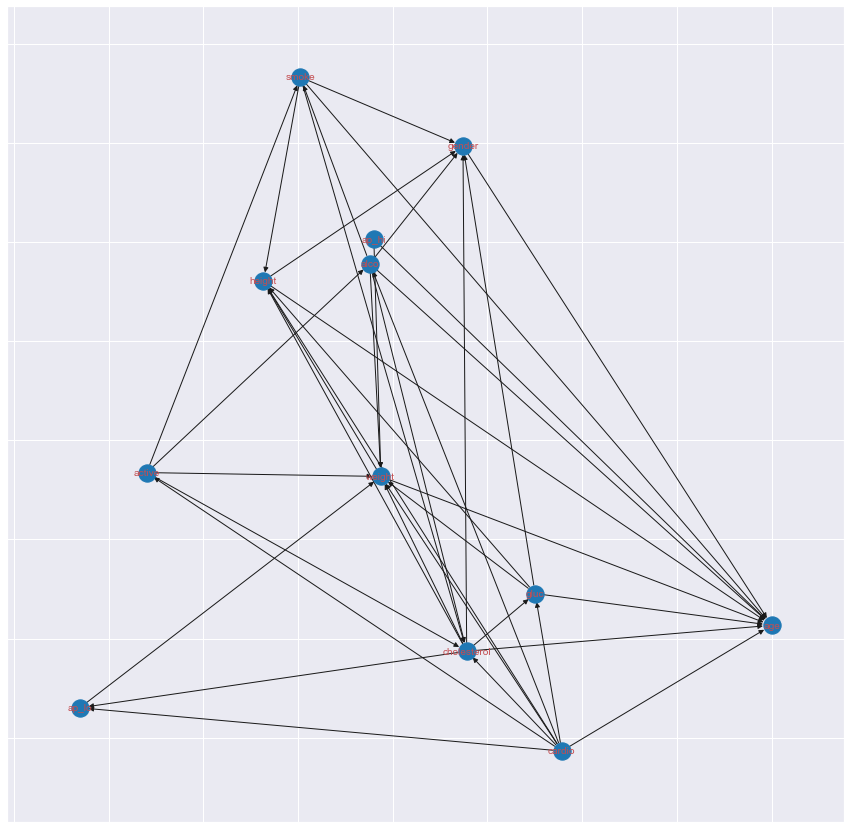

In [94]:
# LiNGAM Algorithm
model_lingam = cdt.causality.graph.LiNGAM()
graph_lingam = model_lingam.predict(cardio_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_lingam, font_size=10, font_color='r')

# SAM (only unconstrained because of a bug of cdt)

100%|██████████| 4000/4000 [1:03:48<00:00,  1.04it/s, disc=3.2, gen=-.251, regul_loss=1.67, tot=-5.12]   


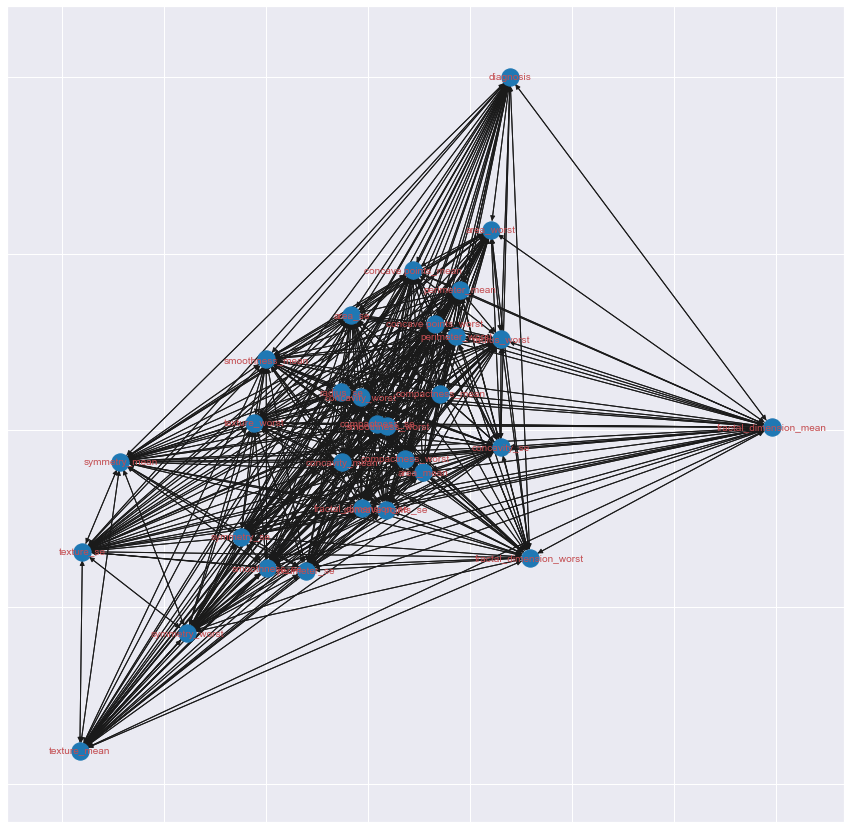

In [102]:
# SAM Algorithm
model_sam = cdt.causality.graph.SAM(nruns=1)
graph_sam = model_sam.predict(breast_cancer_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_sam, font_size=10, font_color='r')

In [107]:
thyroid_df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
referral source              0
binaryClass                  0
dtype: int64

100%|██████████| 2/2 [00:08<00:00,  4.47s/it, disc=0.455, gen=-.348, regul_loss=1.97, tot=-7.79]


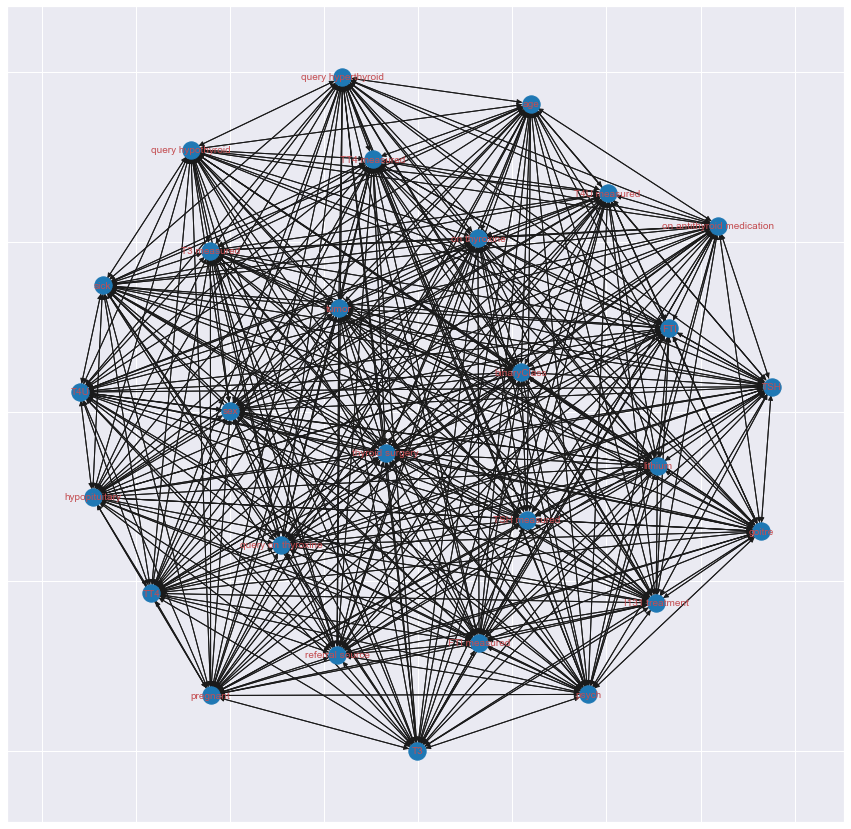

In [111]:
# SAM Algorithm
model_sam = cdt.causality.graph.SAM(nh=5, nruns=1, train_epochs=1, test_epochs=1,verbose=True)
graph_sam = model_sam.predict(thyroid_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_sam, font_size=10, font_color='r')

100%|██████████| 2/2 [03:07<00:00, 93.70s/it, disc=0.453, gen=-.351, regul_loss=0.0184, tot=-4.19] 


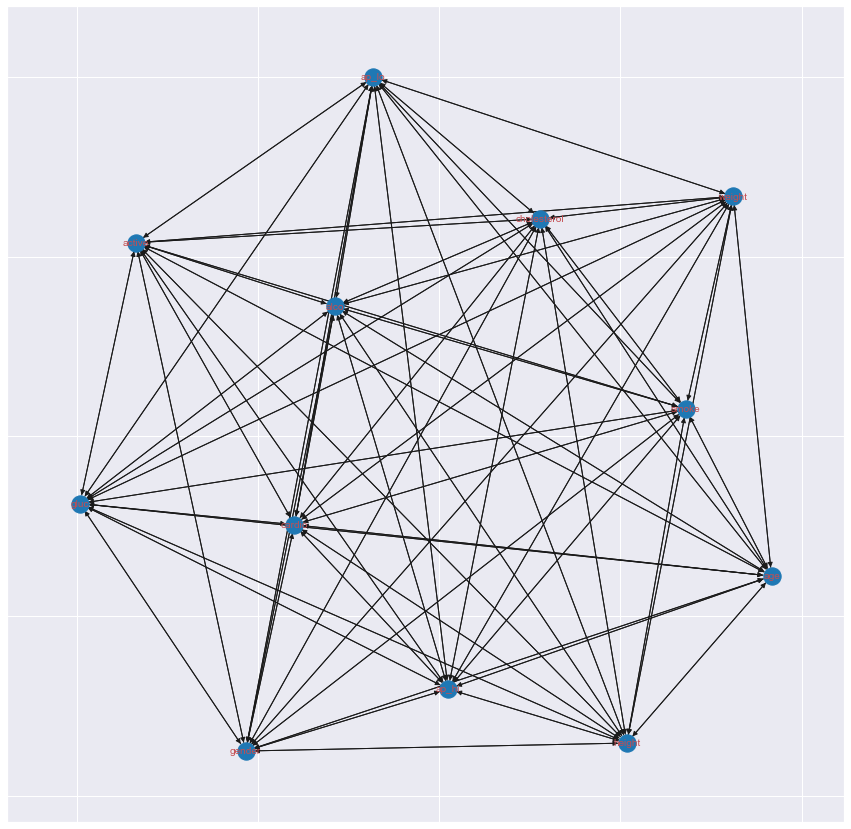

In [112]:
# SAM Algorithm
model_sam = cdt.causality.graph.SAM(nh=5, nruns=1, train_epochs=1, test_epochs=1, verbose=True)
graph_sam = model_sam.predict(cardio_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_sam, font_size=10, font_color='r')

# CGNN

## Constrained

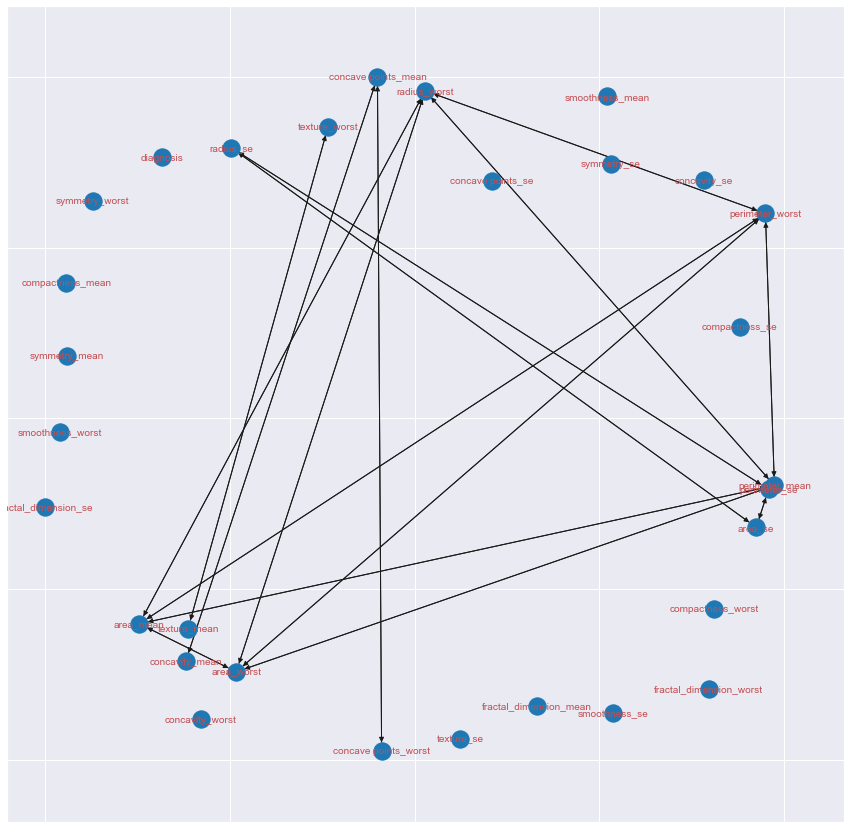

In [97]:
# CGNN Algorithm
model_cgnn = cdt.causality.graph.CGNN(nh=5, nruns=1, train_epochs=1, test_epochs=1, gpus=1, verbose=True)
graph_cgnn = model_cgnn.predict(breast_cancer_df, skeleton_bc)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_cgnn, font_size=10, font_color='r')

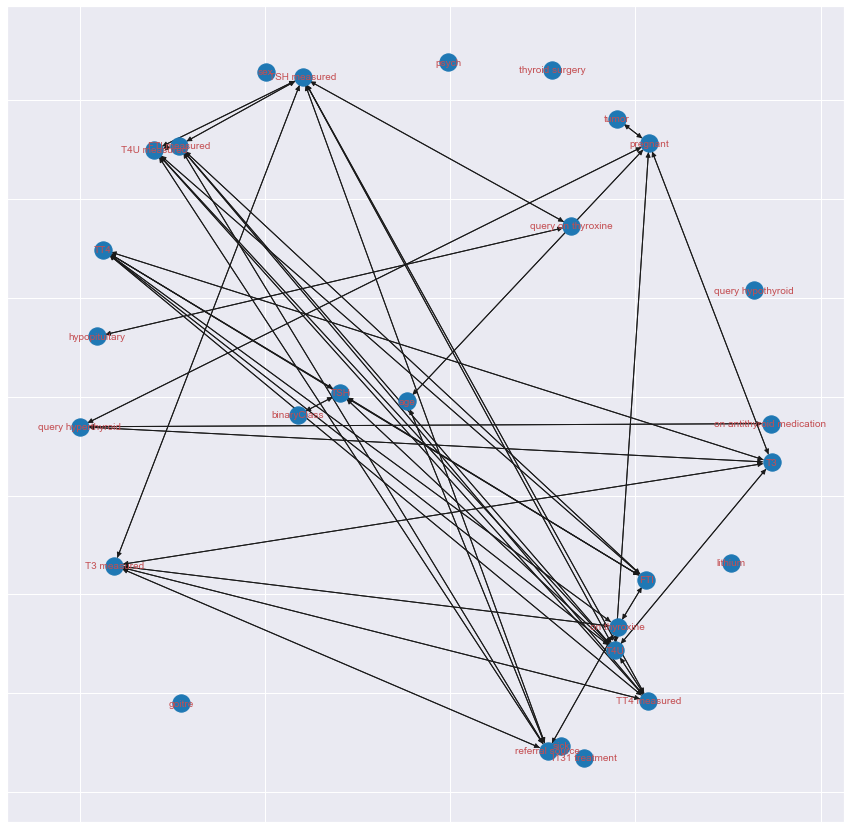

In [98]:
# CGNN Algorithm
model_cgnn = cdt.causality.graph.CGNN(nh=5, nruns=1, train_epochs=1, test_epochs=1, gpus=1, verbose=True)
graph_cgnn = model_cgnn.predict(thyroid_df, skeleton_t)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_cgnn, font_size=10, font_color='r')

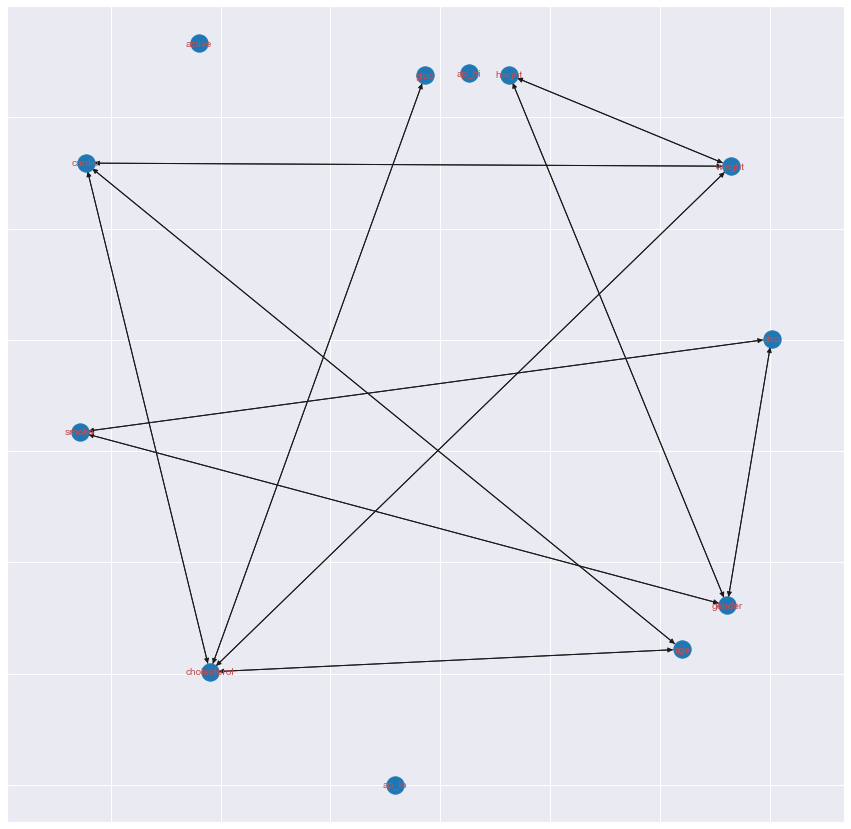

In [99]:
# CGNN Algorithm
model_cgnn = cdt.causality.graph.CGNN(nh=5, nruns=1, train_epochs=1, test_epochs=1, gpus=1, verbose=True)
graph_cgnn = model_cgnn.predict(cardio_df, skeleton_c)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_cgnn, font_size=10, font_color='r')

## Unconstrained

In [100]:
# CGNN Algorithm
model_cgnn = cdt.causality.graph.CGNN(nh=5, nruns=1, train_epochs=1, test_epochs=1, gpus=1, verbose=True)
graph_cgnn = model_cgnn.predict(breast_cancer_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_cgnn, font_size=10, font_color='r')

KeyboardInterrupt: 

In [101]:
# CGNN Algorithm
model_cgnn = cdt.causality.graph.CGNN(nh=5, nruns=1, train_epochs=1, test_epochs=1, gpus=1, verbose=True)
graph_cgnn = model_cgnn.predict(thyroid_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_cgnn, font_size=10, font_color='r')

KeyboardInterrupt: 

# FSGNN

In [ ]:
from cdt.independence.graph import FSGNN
df_features = breast_cancer_df.iloc[:,1:]
df_target = breast_cancer_df[['diagnosis']]
obj = FSGNN(nh=5, nruns=1, train_epochs=1, test_epochs=1, verbose=True)
output = obj.predict_features(df_features, df_target)
ugraph = obj.predict(df_features) 

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(ugraph, font_size=10, font_color='r')

In [ ]:
breast_cancer_df.iloc[:,:]

In [ ]:
df_features = thyroid_df.iloc[:,:-1]
df_target = thyroid_df[['binaryClass']]
model_fsgnn = FSGNN(nh=5, nruns=1, train_epochs=1, test_epochs=1, verbose=True)
fsgnn_output = model_fsgnn.predict_features(df_features, df_target)
fsgnn_skeleton = model_fsgnn.predict(df_features) 

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(fsgnn_skeleton, font_size=10, font_color='r')

In [ ]:
temp = cardio_df.sample(frac=0.01, random_state=1)

In [ ]:
temp.info()

In [ ]:
df_features = temp.iloc[:,:-1] 
df_target = temp[['cardio']]
model_fsgnn = FSGNN(nh=5, nruns=1, train_epochs=1, test_epochs=1, verbose=True)
fsgnn_output = model_fsgnn.predict_features(df_features, df_target)
fsgnn_skeleton = model_fsgnn.predict(df_features) 

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(fsgnn_skeleton, font_size=10, font_color='r')


# Synthetic data

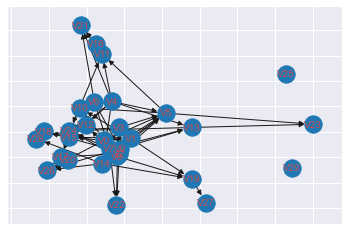

In [13]:
generator = AcyclicGraphGenerator('linear', npoints=10000, nodes=30)
data, graph = generator.generate()
generator.to_csv('generated_graph')

nx.draw_networkx(graph, font_size=10, font_color='r')

In [14]:
data

V0    V1    V2    V3   V4    V5    V6    V7    V8    V9   V10   V11   V12   V13  V14   V15   V16   V17   V18   V19   V20   V21   V22   V23   V24   V25  V26   V27   V28   V29
0    -0.77  0.84  0.49  0.45 0.38  0.57  0.90  0.65 -0.07  1.07  0.51  0.79  0.77  0.90 0.46  1.18 -0.69  1.35  1.03  0.81  0.94  0.51  0.46  0.84  0.43 -2.23 0.94  1.02  0.69  0.10
1    -1.10 -0.91  0.14  0.13 1.36  0.06  0.77 -0.03 -0.32  0.40  0.18  0.73  0.36  0.36 1.35  1.05 -0.58  0.56  0.42 -0.70  1.05  0.93  0.09  0.31  0.06 -1.72 1.22 -0.08  1.32 -0.10
2    -0.84 -1.52  0.12 -0.02 0.14 -0.51  1.47 -0.32  0.01  0.60 -0.33 -0.32  0.62 -0.12 0.18  1.18 -0.90  0.72  0.52 -1.20  0.94 -0.22  0.10 -0.12  0.10 -0.26 0.68 -1.00 -0.31 -0.05
3    -0.87  0.79  0.13  0.22 0.75  0.72  0.58  0.41 -0.32  0.69  0.95  1.20 -0.06  0.63 0.77  0.79 -0.30  0.53  0.82  0.63  1.61  0.97  0.32  0.74  0.45 -0.85 1.38  0.55  1.12 -0.34
4    -0.98  0.52  0.14  0.04 1.52  0.78  0.98  0.13 -0.39  0.90  1.04  1.43 -0.23  0.71 1.49  1.37  0.13  1.24  0.53  1.32  1.22  1.73 -0.03  0.65  0.59 -0.42 1.55  1.49  1.32 -0.48
...    ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...
9995  1.17  0.86 -0.69 -0.77 1.51 -0.05 -1.92 -0.68 -1.16 -1.27  0.14  0.65 -0.09 -0.97 1.54 -0.81 -1.61 -0.81 -0.64 -0.99 -0.37 -0.10 -0.76 -0.89 -0.80 -0.73 0.52 -0.90  1.26  2.05
9996  1.62  1.56 -0.75 -0.79 1.81  0.45 -2.05 -0.76 -1.04 -1.08  0.74  1.35 -0.07 -0.37 1.66 -0.68 -1.28 -0.69 -1.11  0.65 -0.32  0.51 -0.69 -0.07 -0.35  0.11 0.74  0.47  0.91  2.26
9997  1.33 -0.45 -0.66 -0.61 1.70 -0.11 -1.84 -0.75 -0.61 -1.39 -0.11  0.60 -0.01 -0.45 1.64 -0.79 -0.32 -1.06 -0.29  0.10 -0.14  0.48 -0.57 -0.60 -0.88  0.35 0.71 -0.09  1.47  1.83
9998  1.36  0.97 -0.72 -0.79 2.54  0.39 -1.23 -0.10 -1.05 -0.80  0.56  1.61  0.60  0.13 2.44  0.35 -0.24 -0.51  0.11  1.45 -0.38  1.63 -0.46  0.17 -0.18 -0.24 1.08  1.23  1.99  1.75
9999  1.66  1.57 -0.87 -0.80 0.95  0.07 -1.74 -0.89 -1.06 -1.26  0.66  0.81  0.34 -1.28 0.91 -0.69 -1.49 -1.11 -0.77  0.98 -0.57 -0.11 -0.83 -0.55 -0.12 -0.46 0.15  0.78  1.18  1.86

[10000 rows x 30 columns]

## Skeleton

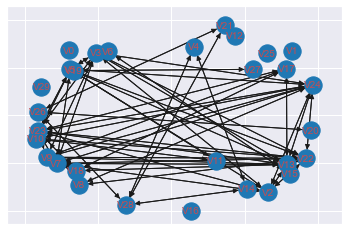

In [15]:
# intialize graph lasso
glasso = cdt.independence.graph.Glasso()

# apply graph lasso to dataset
skeleton = glasso.predict(data, 0.8)
skeleton.remove_edges_from(nx.selfloop_edges(skeleton))

# visualize network
fig=plt.figure()
nx.draw_networkx(skeleton, font_size=10, font_color='r')

In [151]:
nx.is_directed_acyclic_graph(skeleton) # => True

False

## PC

### Constrained

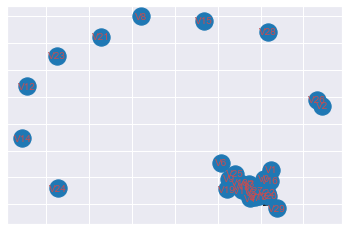

In [116]:
model_pc = cdt.causality.graph.PC()
predict = model_pc.predict(data, skeleton)

nx.draw_networkx(predict, font_size=10, font_color='r')

PC (constrained):
Structural hamming distance: 95
Area under the curve: 0.332


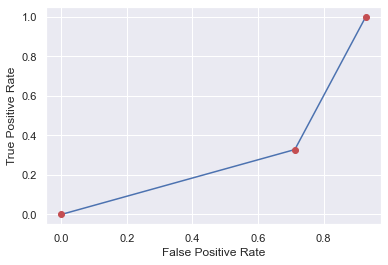

In [117]:
shd = cdt.metrics.SHD(graph, predict)
auc, roc = cdt.metrics.precision_recall(graph, predict)

# Correction for plotting 
roc = tuple([(1-t[0], t[1]) for t in roc])
fpr = [x[0] for x in roc]
tpr = [x[1] for x in roc]

print("PC (constrained):")
print(f"Structural hamming distance: {shd}")
print(f"Area under the curve: {auc:.3f}")

plt.plot(fpr,tpr)
plt.plot(fpr,tpr,'or')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Unconstrained

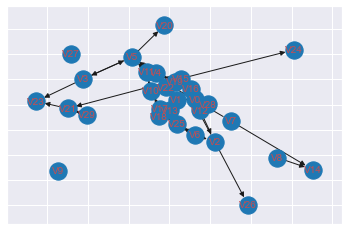

In [118]:
model_pc = cdt.causality.graph.PC()
predict = model_pc.predict(data)

nx.draw_networkx(predict, font_size=10, font_color='r')

PC (unconstrained):
Structural hamming distance: 75
Area under the curve: 0.367


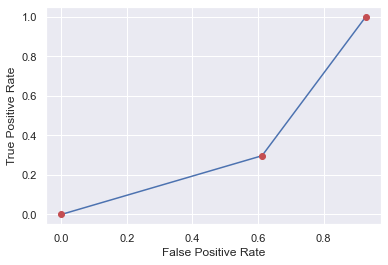

In [119]:
shd = cdt.metrics.SHD(graph, predict)
auc, roc = cdt.metrics.precision_recall(graph, predict)

# Correction for plotting 
roc = tuple([(1-t[0], t[1]) for t in roc])
fpr = [x[0] for x in roc]
tpr = [x[1] for x in roc]

print("PC (unconstrained):")
print(f"Structural hamming distance: {shd}")
print(f"Area under the curve: {auc:.3f}")

plt.plot(fpr,tpr)
plt.plot(fpr,tpr,'or')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## GES

### Constrained

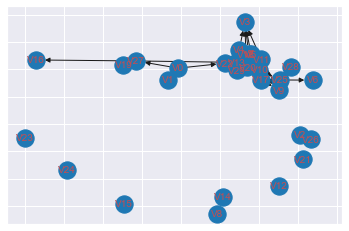

In [120]:
model_ges = cdt.causality.graph.GES()
predict = model_ges.predict(data, skeleton)

nx.draw_networkx(predict, font_size=10, font_color='r')

GES (constrained):
Structural hamming distance: 97
Area under the curve: 0.240


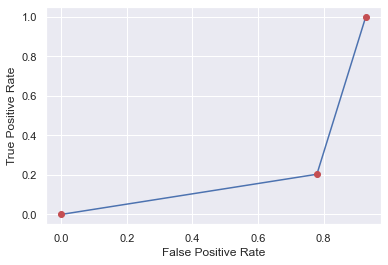

In [121]:
shd = cdt.metrics.SHD(graph, predict)
auc, roc = cdt.metrics.precision_recall(graph, predict)

# Correction for plotting 
roc = tuple([(1-t[0], t[1]) for t in roc])
fpr = [x[0] for x in roc]
tpr = [x[1] for x in roc]

print("GES (constrained):")
print(f"Structural hamming distance: {shd}")
print(f"Area under the curve: {auc:.3f}")

plt.plot(fpr,tpr)
plt.plot(fpr,tpr,'or')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Unconstrained

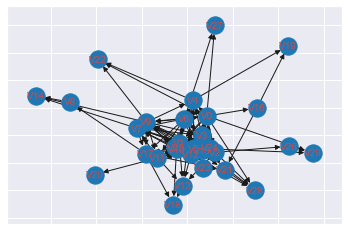

In [122]:
model_ges = cdt.causality.graph.GES()
predict = model_ges.predict(data)

nx.draw_networkx(predict, font_size=10, font_color='r')

GES (unconstrained):
Structural hamming distance: 90
Area under the curve: 0.564


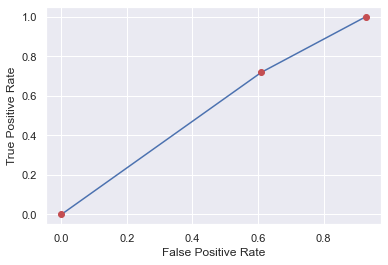

In [123]:
shd = cdt.metrics.SHD(graph, predict)
auc, roc = cdt.metrics.precision_recall(graph, predict)

# Correction for plotting 
roc = tuple([(1-t[0], t[1]) for t in roc])
fpr = [x[0] for x in roc]
tpr = [x[1] for x in roc]

print("GES (unconstrained):")
print(f"Structural hamming distance: {shd}")
print(f"Area under the curve: {auc:.3f}")

plt.plot(fpr,tpr)
plt.plot(fpr,tpr,'or')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## LiNGAM

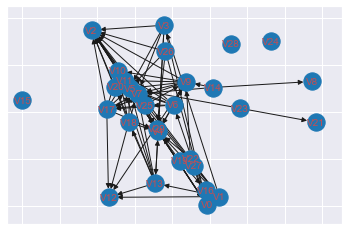

In [124]:
model_lingam = cdt.causality.graph.LiNGAM()
predict = model_lingam.predict(data)

nx.draw_networkx(predict, font_size=10, font_color='r')

LiNGAM:
Structural hamming distance: 127
Area under the curve: 0.289


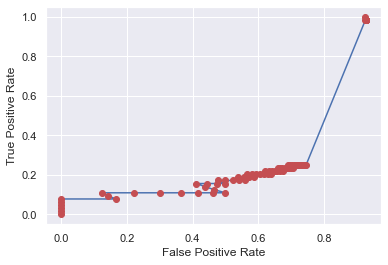

In [125]:
shd = cdt.metrics.SHD(graph, predict)
auc, roc = cdt.metrics.precision_recall(graph, predict)

# Correction for plotting 
roc = tuple([(1-t[0], t[1]) for t in roc])
fpr = [x[0] for x in roc]
tpr = [x[1] for x in roc]

print("LiNGAM:")
print(f"Structural hamming distance: {shd}")
print(f"Area under the curve: {auc:.3f}")

plt.plot(fpr,tpr)
plt.plot(fpr,tpr,'or')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## SAM

100%|██████████| 2/2 [00:31<00:00, 15.69s/it, disc=0.417, gen=-.364, regul_loss=0.851, tot=-10.1]


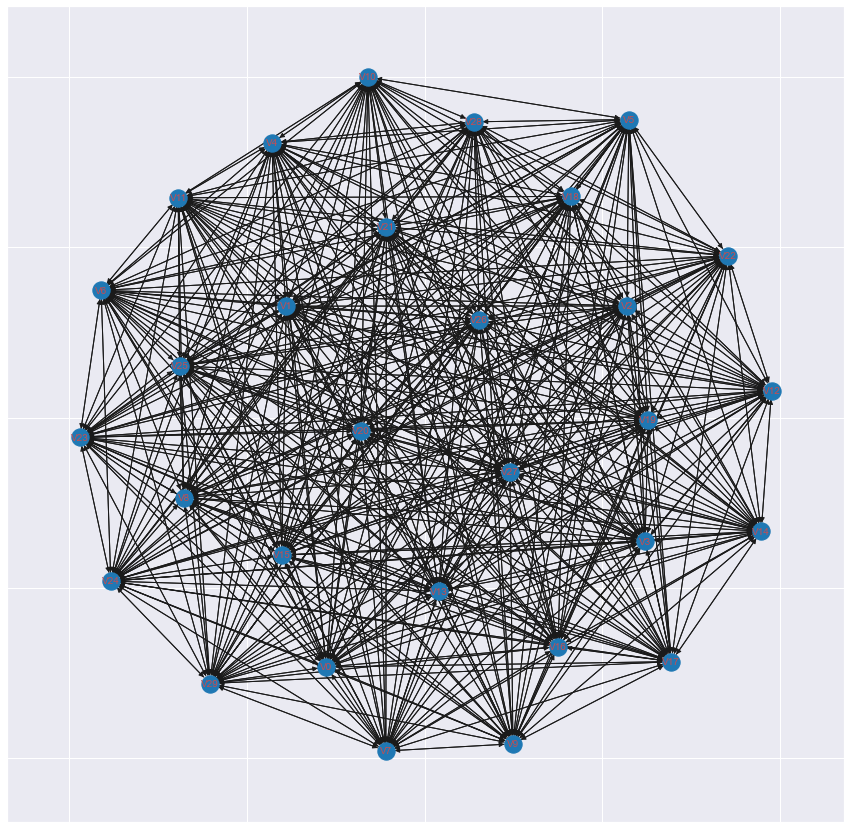

In [132]:
# SAM Algorithm
model_sam = cdt.causality.graph.SAM(nh=5, nruns=1, train_epochs=1, test_epochs=1,verbose=True)
predict = model_sam.predict(data)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(predict, font_size=10, font_color='r')

SAM:
Structural hamming distance: 806
Area under the curve: 0.080


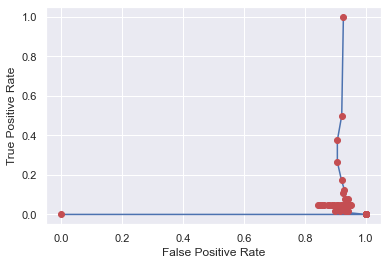

In [133]:
shd = cdt.metrics.SHD(graph, predict)
auc, roc = cdt.metrics.precision_recall(graph, predict)

# Correction for plotting 
roc = tuple([(1-t[0], t[1]) for t in roc])
fpr = [x[0] for x in roc]
tpr = [x[1] for x in roc]

print("SAM:")
print(f"Structural hamming distance: {shd}")
print(f"Area under the curve: {auc:.3f}")

plt.plot(fpr,tpr)
plt.plot(fpr,tpr,'or')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## CGNN

In [ ]:
# SAM Algorithm
model_cgnn = cdt.causality.graph.CGNN(nh=5, nruns=1, train_epochs=1, test_epochs=1,verbose=True)
predict = model_cgnn.predict(data)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(predict, font_size=10, font_color='r')

In [138]:
nx.is_directed_acyclic_graph(skeleton) # => True

False